<img src="images/interior-design-gastronomie-restaurantdesign-berlin.jpg" />
image source: https://www.juni.studio/project/interior-design-restaurant-in-berlin/
<h1 align=center><font size = 6> Ideal Locations for New Restaurant Business in Berlin</font></h1>

## Summary
This project aims at serving recommendations for ideal locations for a new restaurant business in Berlin. A restaurant business is a very prospective and profitable business in general, particularly big cities such as Berlin. One of the most important parts of this business is to choose a well-suited place where a restaurant will be established. This project is focusing on recommending a model for profitabe places for restaurant business based on analysing open data especially Foursquare API data and other public internet resources.

## Table of Contents



<font size = 3>

1. Introduction

2. Data gathering and preliminary analyses
    
3. Methodology
    
    3.1. Explore the Neighborhoods of Berlin
    
    3.2. Analyze and Cluster Neighborhoods
    
    3.3. Analyze and Make Prediction Models

4. Results and Discussion
    
5. Conclusion
</font>


## 1. Introduction
This project aims at serving recommendations for ideal geographical locations for a new restaurant business in Berlin. A restaurant business is a very prospective and profitable business in general, particularly big cities such as Berlin. One of the most important parts of this business is to choose a well-suited place where a restaurant will be established. This project is focusing on recommending a model for profitabe places for restaurant business based on analysing open data especially Foursquare API data and other public internet resources.

Berlin is the capital and largest city of Germany by both area and population. Its 3,769,495 (2019) inhabitants make it the most populous and crowded city of the EU. The city is one of Germany's 16 federal states. Its economy is based on high-tech firms and the service sector, encompassing a diverse range of creative industries, research facilities, media corporations and convention venues. Berlin serves as a continental hub for air and rail traffic and has a highly complex public transportation network. In addition, Berlin is hosting many universities, museums, movie theaters, and diverse historical and cultural places. From this perspective, a new restaurant business is a real option for this city with this gighly populated target area.

Before starting to analysis, we should determine the data which we need for this business. One of the challenges in data analysis is to define the required data which can represent the problem adequately and this should be done with the project partners. As bussiness understanding, let's check the open sources to define the location based requirements for the restaurant business such as  https://fitsmallbusiness.com/choose-a-restaurant-location/, and summarize the required demographic and geographic data for this analysis. What we need for this analysis is as follows:

1. Neighborhoods (For clustering and classification purposes)
2. Locations of universities, stadiums, theaters, parking places, train stations, shopping malls, and airports
3. Crime rates
4. General population and age classification
    1. 15-35 (Fast-food)
    2. 25-45 (Bar-Bistro) 
    3. 30-50 (Casual dining)
    4. 35-65 (Fine dining)
    5. 65+ 
    6. Male/female distribution
    7. Ethnicity (or domestic and foreign population)
5. Cusine types and/or restaurant styles

Our first goal is to get the data and classify them according to neighborhoods of Berlin and to make cluster analysis using venue categories and attributes.

The final target is to be able to define a prediction model to choose or rank the best locations from a given dataset by using machine learning algorithms on data we obtained from the attributes of previously established restaurants.

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [164]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from geopy.geocoders import Nominatim
import geopy
import os

import json
import requests
from pandas.io.json import json_normalize

%matplotlib inline 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans

import folium
from folium import plugins
import ipywidgets

#### Define Foursquare Credentials and Version

In [165]:
# If you want two use live data from Foursquare API, you should write your own creditentials below.
# or, you can use local files (on github repository) by inserting read_csv statements where you need.

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

## 2. Data gathering and preliminary analyses

Let's start with the neighborhoods of Berlin data in the following link:
https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin for our analysis.

Next, let's continue with Foursquare data which can be obtained by means of Foursquare API freely. Categories of venues can be found in this link: https://developer.foursquare.com/docs/build-with-foursquare/categories/ . When we examined the category list, in addition to 'Food':'4d4b7105d754a06374d81259'category, we see that the following venues  have valuable information for this project:

 - 'College & University':'4d4b7105d754a06372d81259',
 - 'Shopping Mall':'4bf58dd8d48988d1fd941735',
 - 'Movie Theater':'4bf58dd8d48988d17f941735',
 - 'Stadium':'4bf58dd8d48988d184941735',
 - 'Train Station':'4bf58dd8d48988d129951735',
 - 'Parking':'4c38df4de52ce0d596b336e1',
 - 'Airport':'4bf58dd8d48988d1ed931735'

While using the Foursquare API for this type of analysis *'intend'* parameter should be *'browse'* or *'global'* depending on the purpose. 

Besides, we can get details of a venue. This is a restricted part of the data provided by Foursquare API. Restrictions apply based on your account type. On the other hand, we can 500 API calls per day for venue details freely which provides us valuable information such as *'price'*, *'rating'* and *'likes'* keys for restaurant categories. These categories are defined in API reference as follows: 

*price*:	An object containing the price tier from 1 (least pricey) - 4 (most pricey) and a message describing the price tier.

*rating*:	Numerical rating of the venue (0 through 10). Returned as part of an explore result, excluded in search results. Not all venues will have a rating.

*likes*:	The count of users who have liked this venue, and groups containing any friends and others who have liked it. The groups included are subject to change.

The complete list of venue details  can be found in the following link: https://developer.foursquare.com/docs/api-reference/venues/details 

We can get the “Crime statistics of Berlin” from the following link: https://www.kriminalitaetsatlas.berlin.de/K-Atlas/bezirke/Fallzahlen&HZ%202012-2019.xlsx 

Finally, we can find population-related data which we need from the following link: 
https://www.statistik-berlin-brandenburg.de/opendata/EWR_Ortsteile_2018-12-31.csv This data named as 'Residents in the districts of Berlin on December 31, 2018' officially and public for research and other purposes. 

For the sake of simplicity, I downloaded to local machine and github repository. 

Berlin has a total number of 12 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need datasets that contain the 12 neighborhoods as well as the the latitude and logitude coordinates of each neighborhood. 

Let's load 'Berlin neighborhoods.txt' dataset locally and convert to Pandas DataFrame to examine.

In [4]:
neighborhoods_data=[]
with open('Berlin neighborhoods.txt',encoding='UTF-8') as txt_data:
    df = txt_data.read().splitlines()
for i,df[i] in enumerate (df):
   neighborhoods_data.append(df[i].split("\t"))

#Convert neighborhoods_data to pandas DataFrame

neighborhoods=pd.DataFrame(neighborhoods_data, columns = ['Borough', 'Neighborhood', 'Population', 'Latitude', 'Longitude'])
neighborhoods['Latitude']=neighborhoods['Latitude'].astype('float64')
neighborhoods['Population']=neighborhoods['Population'].astype('int')
neighborhoods['Longitude']=neighborhoods['Longitude'].astype('float64')
neighborhoods.dtypes
neighborhoods

Borough                Neighborhood  Population   Latitude  Longitude
0   Berlin  Charlottenburg-Wilmersdorf      341327  52.497058  13.296490
1   Berlin    Friedrichshain-Kreuzberg      289120  52.501500  13.435120
2   Berlin                 Lichtenberg      290493  52.514581  13.498392
3   Berlin         Marzahn-Hellersdorf      268739  52.539720  13.584280
4   Berlin                       Mitte      383457  52.516740  13.366790
5   Berlin                    Neukölln      330786  52.480200  13.433640
6   Berlin                      Pankow      407039  52.571050  13.404970
7   Berlin               Reinickendorf      264826  52.567550  13.331650
8   Berlin                     Spandau      243080  52.550090  13.200356
9   Berlin         Steglitz-Zehlendorf      308077  52.443640  13.229080
10  Berlin        Tempelhof-Schöneberg      351429  52.447630  13.385350
11  Berlin            Treptow-Köpenick      269775  52.445817  13.574580

## 3. Methodology
### 3.1. Explore the Neighborhoods of Berlin

#### Let's use geopy library to get the latitude and longitude values of Berlin.

In [5]:
address = 'Berlin, DE'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berlin are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berlin are 52.5170365, 13.3888599.


#### Create a map of Berlin with neighborhoods superimposed on top.
Let's visualize the neighborhoods of Berlin. We can add neighhborhoods layer to be able to see borders of neighborhoods. The colors of neighborhoods are proportional to the populations of neighborhoods. The color scale is on the top right corner of the map.

In [6]:
with open('bezirksgrenzen.geojson') as f:
    layer_neighborhoods=json.load(f)

In [7]:
# create map of population distribution in Berlin

map_berlin = folium.Map(location=[latitude, longitude], tiles='CartoDB Positron', zoom_start=10)

for i in layer_neighborhoods['features']:
    i['id'] = i['properties']['Gemeinde_name']
   
# choropleth
folium.Choropleth(
    geo_data=layer_neighborhoods,
    name='Neighborhoods',
    data=neighborhoods,
    columns=['Neighborhood', 'Population'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Population',
    highlight=True
).add_to(map_berlin)    

# to put a marker on each neighborhood, uncomment following lines
#for (index, row) in neighborhoods.iterrows():
#    folium.Marker(location=[row.loc['Latitude'], row.loc['Longitude']], 
#                  popup='Name: ' + row.loc['Neighborhood'] + ' ' + 'Population: ' + str(row.loc['Population']), 
#                  icon=folium.Icon(color='cadetblue', icon='glyphicon-user'),
#                  tooltip='click').add_to(map_berlin)

# plugin for mini map
minimap = plugins.MiniMap(toggle_display=True)

# add minimap to map
map_berlin.add_child(minimap)

# add scroll zoom toggler to map
plugins.ScrollZoomToggler().add_to(map_berlin)

# add full screen button to map
plugins.Fullscreen(position='topright').add_to(map_berlin)
map_berlin

We can see the distribution of population on the map.

Next, when we look at the venue categories of Foursquare API in the following link:
https://developer.foursquare.com/docs/build-with-foursquare/categories/
Wwe can see the following venues  have valuable information for our needs:


 - 'College & University':'4d4b7105d754a06372d81259',
 - 'Shopping Mall':'4bf58dd8d48988d1fd941735',
 - 'Movie Theater':'4bf58dd8d48988d17f941735',
 - 'Stadium':'4bf58dd8d48988d184941735',
 - 'Train Station':'4bf58dd8d48988d129951735',
 - 'Parking':'4c38df4de52ce0d596b336e1',
 - 'Airport':'4bf58dd8d48988d1ed931735'

Keep in mind that,while using the Foursquare API for this type of analysis *'intend'* parameter should be *'browse'* or *'global'* depending on the purpose. 


##### Let's create a function to explore all the neighborhoods for above listed categories in Berlin

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&intent={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            intent,
            lat, 
            lng, 
            radius,
            categoryIdchoose,
            LIMIT)
        results = requests.get(url).json()["response"]['venues']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['location']['distance'], 
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Distance',
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
category_list_to_examine={}
category_list_to_examine={'College & University':'4d4b7105d754a06372d81259',
                         'Shopping Mall':'4bf58dd8d48988d1fd941735',
                         'Movie Theater':'4bf58dd8d48988d17f941735',
                         'Stadium':'4bf58dd8d48988d184941735',
                         'Train Station':'4bf58dd8d48988d129951735',
                         'Parking':'4c38df4de52ce0d596b336e1',
                         'Airport':'4bf58dd8d48988d1ed931735'}

Now let's explore each category for all neighborhoods. When we look at the distances between nearest radius can be defined as 2000 meter.

In [10]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
intent = 'browse'
neighborhood_venues_cat={}
for i, j in category_list_to_examine.items(): 
    print (i, ':', j)
    categoryIdchoose = j
    neighborhood_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )
    neighborhood_venues_cat[i]=neighborhood_venues

College & University : 4d4b7105d754a06372d81259
Shopping Mall : 4bf58dd8d48988d1fd941735
Movie Theater : 4bf58dd8d48988d17f941735
Stadium : 4bf58dd8d48988d184941735
Train Station : 4bf58dd8d48988d129951735
Parking : 4c38df4de52ce0d596b336e1
Airport : 4bf58dd8d48988d1ed931735


#### Let's start to explore each neighborhood with 'College & University' category

In [11]:
neighborhood_venues_cat['College & University']

Neighborhood  Neighborhood Latitude  \
0    Charlottenburg-Wilmersdorf              52.497058   
1    Charlottenburg-Wilmersdorf              52.497058   
2    Charlottenburg-Wilmersdorf              52.497058   
3    Charlottenburg-Wilmersdorf              52.497058   
4    Charlottenburg-Wilmersdorf              52.497058   
5    Charlottenburg-Wilmersdorf              52.497058   
6    Charlottenburg-Wilmersdorf              52.497058   
7    Charlottenburg-Wilmersdorf              52.497058   
8    Charlottenburg-Wilmersdorf              52.497058   
9    Charlottenburg-Wilmersdorf              52.497058   
10   Charlottenburg-Wilmersdorf              52.497058   
11   Charlottenburg-Wilmersdorf              52.497058   
12   Charlottenburg-Wilmersdorf              52.497058   
13   Charlottenburg-Wilmersdorf              52.497058   
14   Charlottenburg-Wilmersdorf              52.497058   
15   Charlottenburg-Wilmersdorf              52.497058   
16   Charlottenburg-Wilmersdorf              52.497058   
17   Charlottenburg-Wilmersdorf              52.497058   
18   Charlottenburg-Wilmersdorf              52.497058   
19   Charlottenburg-Wilmersdorf              52.497058   
20   Charlottenburg-Wilmersdorf              52.497058   
21   Charlottenburg-Wilmersdorf              52.497058   
22   Charlottenburg-Wilmersdorf              52.497058   
23   Charlottenburg-Wilmersdorf              52.497058   
24   Charlottenburg-Wilmersdorf              52.497058   
25   Charlottenburg-Wilmersdorf              52.497058   
26   Charlottenburg-Wilmersdorf              52.497058   
27   Charlottenburg-Wilmersdorf              52.497058   
28   Charlottenburg-Wilmersdorf              52.497058   
29   Charlottenburg-Wilmersdorf              52.497058   
30   Charlottenburg-Wilmersdorf              52.497058   
31   Charlottenburg-Wilmersdorf              52.497058   
32   Charlottenburg-Wilmersdorf              52.497058   
33   Charlottenburg-Wilmersdorf              52.497058   
34   Charlottenburg-Wilmersdorf              52.497058   
35   Charlottenburg-Wilmersdorf              52.497058   
36   Charlottenburg-Wilmersdorf              52.497058   
37   Charlottenburg-Wilmersdorf              52.497058   
38   Charlottenburg-Wilmersdorf              52.497058   
39   Charlottenburg-Wilmersdorf              52.497058   
40   Charlottenburg-Wilmersdorf              52.497058   
41   Charlottenburg-Wilmersdorf              52.497058   
42   Charlottenburg-Wilmersdorf              52.497058   
43   Charlottenburg-Wilmersdorf              52.497058   
44   Charlottenburg-Wilmersdorf              52.497058   
45   Charlottenburg-Wilmersdorf              52.497058   
46   Charlottenburg-Wilmersdorf              52.497058   
47   Charlottenburg-Wilmersdorf              52.497058   
48   Charlottenburg-Wilmersdorf              52.497058   
49   Charlottenburg-Wilmersdorf              52.497058   
50     Friedrichshain-Kreuzberg              52.501500   
51     Friedrichshain-Kreuzberg              52.501500   
52     Friedrichshain-Kreuzberg              52.501500   
53     Friedrichshain-Kreuzberg              52.501500   
54     Friedrichshain-Kreuzberg              52.501500   
55     Friedrichshain-Kreuzberg              52.501500   
56     Friedrichshain-Kreuzberg              52.501500   
57     Friedrichshain-Kreuzberg              52.501500   
58     Friedrichshain-Kreuzberg              52.501500   
59     Friedrichshain-Kreuzberg              52.501500   
60     Friedrichshain-Kreuzberg              52.501500   
61     Friedrichshain-Kreuzberg              52.501500   
62     Friedrichshain-Kreuzberg              52.501500   
63     Friedrichshain-Kreuzberg              52.501500   
64     Friedrichshain-Kreuzberg              52.501500   
65     Friedrichshain-Kreuzberg              52.501500   
66     Friedrichshain-Kreuzberg              52.501500   
67     Friedrichshain-Kreuzberg              52.501500   
68     Friedrichs

Let's check the Venue category for 'College & University' if the sub classification data are correct or not for our purpose.

In [12]:
neighborhood_venues_cat['College & University']["Venue Category"].unique()

array(['Trade School', 'General College & University',
       'College Rec Center', 'College Gym', 'College Arts Building',
       'College Residence Hall', 'College Classroom', 'Student Center',
       'College Lab', 'University', 'School',
       'College Administrative Building', 'College Academic Building',
       'Community College', 'Fraternity House', 'College Auditorium',
       'College Bookstore', 'College Library', 'College Quad',
       'College Technology Building', 'College Science Building',
       'Medical School', 'Electronics Store', 'Cafeteria', 'Theater',
       'College History Building', 'College Cafeteria', 'College Theater',
       'Sorority House', 'College & University', 'Adult Education Center',
       'Language School', 'Dance Studio',
       'College Communications Building', 'College Soccer Field',
       'Law School', 'College Football Field', 'College Basketball Court',
       'College Baseball Diamond', "Doctor's Office", 'High School',
       'Elementa

Our purpose in this dataset is to determine the places where a large group of people gathered. So, from the above list following sub categories can be choosen:'General College & University', 'College & University' and 'University'. The other subgroups are not suitable for our target. That's why let's dismiss them.

In [13]:
list_of_values_uni=['College & University','General College & University', 'University'] 
df_neighborhood_uni=neighborhood_venues_cat['College & University'][neighborhood_venues_cat['College & University']["Venue Category"].isin (list_of_values_uni)]
df_neighborhood_uni.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1  Charlottenburg-Wilmersdorf              52.497058                13.29649   
2  Charlottenburg-Wilmersdorf              52.497058                13.29649   
3  Charlottenburg-Wilmersdorf              52.497058                13.29649   
8  Charlottenburg-Wilmersdorf              52.497058                13.29649   
9  Charlottenburg-Wilmersdorf              52.497058                13.29649   

                                     Venue  Venue Latitude  Venue Longitude  \
1                              Hasenschule       52.499416        13.316608   
2            Business Trends Academy (BTA)       52.491138        13.300033   
3                       NLP-Zentrum Berlin       52.488869        13.322747   
8                         cityacademy GmbH       52.507249        13.306568   
9  Stiftung Wissenschaft und Politik (SWP)       52.498116        13.321458   

   Venue Distance                Venue Category  
1            1388  General College & University  
2             701  General College & University  
3            1999  General College & University  
8            1324  General College & University  
9            1696  General College & University

Now, let's group them by neighborhoods and count them. After that we merge them to the neighborhoods dataframe. With this count value we know that how many üniversities we have in each neighborhood.

In [14]:
df_neighborhood_uni_count=df_neighborhood_uni.groupby('Neighborhood').count()
df_neighborhood_uni_count.rename({'Venue Category': 'Uni&College'}, axis=1, inplace=True)
neighborhoods_1 = pd.merge(neighborhoods, df_neighborhood_uni_count['Uni&College'], on='Neighborhood')
neighborhoods_1

Borough                Neighborhood  Population   Latitude  Longitude  \
0   Berlin  Charlottenburg-Wilmersdorf      341327  52.497058  13.296490   
1   Berlin    Friedrichshain-Kreuzberg      289120  52.501500  13.435120   
2   Berlin                 Lichtenberg      290493  52.514581  13.498392   
3   Berlin         Marzahn-Hellersdorf      268739  52.539720  13.584280   
4   Berlin                       Mitte      383457  52.516740  13.366790   
5   Berlin                    Neukölln      330786  52.480200  13.433640   
6   Berlin                      Pankow      407039  52.571050  13.404970   
7   Berlin               Reinickendorf      264826  52.567550  13.331650   
8   Berlin                     Spandau      243080  52.550090  13.200356   
9   Berlin         Steglitz-Zehlendorf      308077  52.443640  13.229080   
10  Berlin        Tempelhof-Schöneberg      351429  52.447630  13.385350   
11  Berlin            Treptow-Köpenick      269775  52.445817  13.574580   

    Uni&College  
0            13  
1            14  
2             8  
3            11  
4            14  
5            12  
6             8  
7             5  
8             2  
9             3  
10            3  
11            1

Let's write the 'College & University' category results into 'export_df_neighborhood_uni.csv' and 'export_df_neighborhood_uni_count.csv' files for future use.

In [15]:
df_neighborhood_uni.to_csv (r'export_df_neighborhood_uni.csv', header=True)

In [16]:
df_neighborhood_uni_count.to_csv (r'export_df_neighborhood_uni_count.csv', header=True)

Now, let's repeat the same process for all categories which we determined to examine and merge the results into the neighborhoods dataframe

#### Exploring the 'Shopping Mall' category

In [19]:
neighborhood_venues_cat['Shopping Mall']

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Charlottenburg-Wilmersdorf              52.497058               13.296490   
1   Charlottenburg-Wilmersdorf              52.497058               13.296490   
2   Charlottenburg-Wilmersdorf              52.497058               13.296490   
3   Charlottenburg-Wilmersdorf              52.497058               13.296490   
4   Charlottenburg-Wilmersdorf              52.497058               13.296490   
5   Charlottenburg-Wilmersdorf              52.497058               13.296490   
6   Charlottenburg-Wilmersdorf              52.497058               13.296490   
7   Charlottenburg-Wilmersdorf              52.497058               13.296490   
8   Charlottenburg-Wilmersdorf              52.497058               13.296490   
9   Charlottenburg-Wilmersdorf              52.497058               13.296490   
10  Charlottenburg-Wilmersdorf              52.497058               13.296490   
11    Friedrichshain-Kreuzberg              52.501500               13.435120   
12    Friedrichshain-Kreuzberg              52.501500               13.435120   
13    Friedrichshain-Kreuzberg              52.501500               13.435120   
14    Friedrichshain-Kreuzberg              52.501500               13.435120   
15    Friedrichshain-Kreuzberg              52.501500               13.435120   
16    Friedrichshain-Kreuzberg              52.501500               13.435120   
17    Friedrichshain-Kreuzberg              52.501500               13.435120   
18    Friedrichshain-Kreuzberg              52.501500               13.435120   
19    Friedrichshain-Kreuzberg              52.501500               13.435120   
20    Friedrichshain-Kreuzberg              52.501500               13.435120   
21                 Lichtenberg              52.514581               13.498392   
22                 Lichtenberg              52.514581               13.498392   
23                 Lichtenberg              52.514581               13.498392   
24                 Lichtenberg              52.514581               13.498392   
25                 Lichtenberg              52.514581               13.498392   
26                 Lichtenberg              52.514581               13.498392   
27                 Lichtenberg              52.514581               13.498392   
28         Marzahn-Hellersdorf              52.539720               13.584280   
29         Marzahn-Hellersdorf              52.539720               13.584280   
30         Marzahn-Hellersdorf              52.539720               13.584280   
31         Marzahn-Hellersdorf              52.539720               13.584280   
32         Marzahn-Hellersdorf              52.539720               13.584280   
33         Marzahn-Hellersdorf              52.539720               13.584280   
34         Marzahn-Hellersdorf              52.539720               13.584280   
35                       Mitte              52.516740               13.366790   
36                       Mitte              52.516740               13.366790   
37                       Mitte              52.516740               13.366790   
38                       Mitte              52.516740               13.366790   
39                       Mitte              52.516740               13.366790   
40                       Mitte              52.516740               13.366790   
41                       Mitte              52.516740               13.366790   
42                       Mitte              52.516740               13.366790   
43                       Mitte              52.516740               13.366790   
44                       Mitte              52.516740               13.366790   
45                       Mitte              52.516740               13.366790   
46                       Mitte              52.516740               13.366790   
47                       Mitte              52.516740               13.366790   
48                       Mitte              52.51

When we examine thethe above list,  'Shopping Mall' sub category is the right one. The others are not suitable for our purpose. Then, let's dismiss them.

In [20]:
list_of_values_malls=['Shopping Mall'] 
df_neighborhood_malls=neighborhood_venues_cat['Shopping Mall'][neighborhood_venues_cat['Shopping Mall']["Venue Category"].isin (list_of_values_malls)]
df_neighborhood_malls.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Charlottenburg-Wilmersdorf              52.497058                13.29649   
1  Charlottenburg-Wilmersdorf              52.497058                13.29649   
2  Charlottenburg-Wilmersdorf              52.497058                13.29649   
3  Charlottenburg-Wilmersdorf              52.497058                13.29649   
4  Charlottenburg-Wilmersdorf              52.497058                13.29649   

                   Venue  Venue Latitude  Venue Longitude  Venue Distance  \
0  Wilmersdorfer Arcaden       52.509326        13.304894            1479   
1            Kant-Center       52.506409        13.306723            1250   
2        Berlin Showroom       52.501942        13.319516            1652   
3             Mega Sonic       52.505840        13.303920            1099   
4         Ku-Damm Karree       52.500810        13.323525            1879   

  Venue Category  
0  Shopping Mall  
1  Shopping Mall  
2  Shopping Mall  
3  Shopping Mall  
4  Shopping Mall

In [21]:
df_neighborhood_malls_count=df_neighborhood_malls.groupby('Neighborhood').count()
df_neighborhood_malls_count.rename({'Venue Category': 'Shopping Mall'}, axis=1, inplace=True)
df_neighborhood_malls_count

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                
Charlottenburg-Wilmersdorf                      8                       8   
Friedrichshain-Kreuzberg                        8                       8   
Lichtenberg                                     4                       4   
Marzahn-Hellersdorf                             6                       6   
Mitte                                           8                       8   
Neukölln                                        9                       9   
Pankow                                          3                       3   
Reinickendorf                                   1                       1   
Spandau                                         3                       3   
Tempelhof-Schöneberg                            4                       4   
Treptow-Köpenick                                3                       3   

                            Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                         
Charlottenburg-Wilmersdorf      8               8                8   
Friedrichshain-Kreuzberg        8               8                8   
Lichtenberg                     4               4                4   
Marzahn-Hellersdorf             6               6                6   
Mitte                           8               8                8   
Neukölln                        9               9                9   
Pankow                          3               3                3   
Reinickendorf                   1               1                1   
Spandau                         3               3                3   
Tempelhof-Schöneberg            4               4                4   
Treptow-Köpenick                3               3                3   

                            Venue Distance  Shopping Mall  
Neighborhood                                               
Charlottenburg-Wilmersdorf               8              8  
Friedrichshain-Kreuzberg                 8              8  
Lichtenberg                              4              4  
Marzahn-Hellersdorf                      6              6  
Mitte                                    8              8  
Neukölln                                 9              9  
Pankow                                   3              3  
Reinickendorf                            1              1  
Spandau                                  3              3  
Tempelhof-Schöneberg                     4              4  
Treptow-Köpenick                         3              3

In [22]:

neighborhoods_2 = pd.merge(neighborhoods_1, df_neighborhood_malls_count['Shopping Mall'], on='Neighborhood', how='left')
neighborhoods_2

Borough                Neighborhood  Population   Latitude  Longitude  \
0   Berlin  Charlottenburg-Wilmersdorf      341327  52.497058  13.296490   
1   Berlin    Friedrichshain-Kreuzberg      289120  52.501500  13.435120   
2   Berlin                 Lichtenberg      290493  52.514581  13.498392   
3   Berlin         Marzahn-Hellersdorf      268739  52.539720  13.584280   
4   Berlin                       Mitte      383457  52.516740  13.366790   
5   Berlin                    Neukölln      330786  52.480200  13.433640   
6   Berlin                      Pankow      407039  52.571050  13.404970   
7   Berlin               Reinickendorf      264826  52.567550  13.331650   
8   Berlin                     Spandau      243080  52.550090  13.200356   
9   Berlin         Steglitz-Zehlendorf      308077  52.443640  13.229080   
10  Berlin        Tempelhof-Schöneberg      351429  52.447630  13.385350   
11  Berlin            Treptow-Köpenick      269775  52.445817  13.574580   

    Uni&College  Shopping Mall  
0            13            8.0  
1            14            8.0  
2             8            4.0  
3            11            6.0  
4            14            8.0  
5            12            9.0  
6             8            3.0  
7             5            1.0  
8             2            3.0  
9             3            NaN  
10            3            4.0  
11            1            3.0

In [23]:
df_neighborhood_malls.to_csv (r'export_df_neighborhood_malls.csv', header=True)

In [24]:
df_neighborhood_malls_count.to_csv (r'export_df_neighborhood_malls_count.csv', header=True)

#### Exploring the 'Movie Theater' category

In [25]:
neighborhood_venues_cat['Movie Theater']

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Charlottenburg-Wilmersdorf              52.497058               13.296490   
1   Charlottenburg-Wilmersdorf              52.497058               13.296490   
2   Charlottenburg-Wilmersdorf              52.497058               13.296490   
3   Charlottenburg-Wilmersdorf              52.497058               13.296490   
4   Charlottenburg-Wilmersdorf              52.497058               13.296490   
5   Charlottenburg-Wilmersdorf              52.497058               13.296490   
6     Friedrichshain-Kreuzberg              52.501500               13.435120   
7     Friedrichshain-Kreuzberg              52.501500               13.435120   
8     Friedrichshain-Kreuzberg              52.501500               13.435120   
9     Friedrichshain-Kreuzberg              52.501500               13.435120   
10    Friedrichshain-Kreuzberg              52.501500               13.435120   
11    Friedrichshain-Kreuzberg              52.501500               13.435120   
12    Friedrichshain-Kreuzberg              52.501500               13.435120   
13    Friedrichshain-Kreuzberg              52.501500               13.435120   
14    Friedrichshain-Kreuzberg              52.501500               13.435120   
15    Friedrichshain-Kreuzberg              52.501500               13.435120   
16    Friedrichshain-Kreuzberg              52.501500               13.435120   
17    Friedrichshain-Kreuzberg              52.501500               13.435120   
18    Friedrichshain-Kreuzberg              52.501500               13.435120   
19    Friedrichshain-Kreuzberg              52.501500               13.435120   
20    Friedrichshain-Kreuzberg              52.501500               13.435120   
21    Friedrichshain-Kreuzberg              52.501500               13.435120   
22    Friedrichshain-Kreuzberg              52.501500               13.435120   
23    Friedrichshain-Kreuzberg              52.501500               13.435120   
24    Friedrichshain-Kreuzberg              52.501500               13.435120   
25    Friedrichshain-Kreuzberg              52.501500               13.435120   
26    Friedrichshain-Kreuzberg              52.501500               13.435120   
27    Friedrichshain-Kreuzberg              52.501500               13.435120   
28                 Lichtenberg              52.514581               13.498392   
29         Marzahn-Hellersdorf              52.539720               13.584280   
30         Marzahn-Hellersdorf              52.539720               13.584280   
31                       Mitte              52.516740               13.366790   
32                       Mitte              52.516740               13.366790   
33                       Mitte              52.516740               13.366790   
34                       Mitte              52.516740               13.366790   
35                       Mitte              52.516740               13.366790   
36                       Mitte              52.516740               13.366790   
37                       Mitte              52.516740               13.366790   
38                       Mitte              52.516740               13.366790   
39                       Mitte              52.516740               13.366790   
40                       Mitte              52.516740               13.366790   
41                       Mitte              52.516740               13.366790   
42                       Mitte              52.516740               13.366790   
43                       Mitte              52.516740               13.366790   
44                       Mitte              52.516740               13.366790   
45                    Neukölln              52.480200               13.433640   
46                    Neukölln              52.480200               13.433640   
47                    Neukölln              52.480200               13.433640   
48                    Neukölln              52.48

Let's check the Venue category for 'Movie Theater' if the classification is
correct or not.

In [26]:
neighborhood_venues_cat['Movie Theater']["Venue Category"].unique()

array(['Movie Theater', 'Indie Movie Theater', 'Multiplex', 'Nightclub',
       'Arcade'], dtype=object)

In [27]:
list_of_values_Theater=['Movie Theater','Indie Movie Theater', 'Multiplex'] 
df_neighborhood_Theater=neighborhood_venues_cat['Movie Theater'][neighborhood_venues_cat['Movie Theater']["Venue Category"].isin (list_of_values_Theater)]
df_neighborhood_Theater.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Charlottenburg-Wilmersdorf              52.497058                13.29649   
1  Charlottenburg-Wilmersdorf              52.497058                13.29649   
2  Charlottenburg-Wilmersdorf              52.497058                13.29649   
3  Charlottenburg-Wilmersdorf              52.497058                13.29649   
4  Charlottenburg-Wilmersdorf              52.497058                13.29649   

                 Venue  Venue Latitude  Venue Longitude  Venue Distance  \
0               Oscars       52.501885        13.307736             932   
1       Private Cinema       52.513103        13.301306            1815   
2  Grusel Horror Modus       52.511208        13.311887            1889   
3          filmkunst66       52.504334        13.319806            1775   
4           Klick Kino       52.505314        13.299631             943   

        Venue Category  
0        Movie Theater  
1        Movie Theater  
2  Indie Movie Theater  
3        Movie Theater  
4        Movie Theater

In [28]:
df_neighborhood_Theater_count=df_neighborhood_Theater.groupby('Neighborhood').count()
df_neighborhood_Theater_count.rename({'Venue Category': 'Movie Theater'}, axis=1, inplace=True)
neighborhoods_3 = pd.merge(neighborhoods_2, df_neighborhood_Theater_count['Movie Theater'], on='Neighborhood',how='left')
neighborhoods_3

Borough                Neighborhood  Population   Latitude  Longitude  \
0   Berlin  Charlottenburg-Wilmersdorf      341327  52.497058  13.296490   
1   Berlin    Friedrichshain-Kreuzberg      289120  52.501500  13.435120   
2   Berlin                 Lichtenberg      290493  52.514581  13.498392   
3   Berlin         Marzahn-Hellersdorf      268739  52.539720  13.584280   
4   Berlin                       Mitte      383457  52.516740  13.366790   
5   Berlin                    Neukölln      330786  52.480200  13.433640   
6   Berlin                      Pankow      407039  52.571050  13.404970   
7   Berlin               Reinickendorf      264826  52.567550  13.331650   
8   Berlin                     Spandau      243080  52.550090  13.200356   
9   Berlin         Steglitz-Zehlendorf      308077  52.443640  13.229080   
10  Berlin        Tempelhof-Schöneberg      351429  52.447630  13.385350   
11  Berlin            Treptow-Köpenick      269775  52.445817  13.574580   

    Uni&College  Shopping Mall  Movie Theater  
0            13            8.0            6.0  
1            14            8.0           22.0  
2             8            4.0            1.0  
3            11            6.0            2.0  
4            14            8.0           13.0  
5            12            9.0           21.0  
6             8            3.0            1.0  
7             5            1.0            2.0  
8             2            3.0            5.0  
9             3            NaN            NaN  
10            3            4.0            2.0  
11            1            3.0            NaN

In [29]:
df_neighborhood_Theater.to_csv (r'export_df_neighborhood_Theater.csv', header=True)

In [30]:
df_neighborhood_Theater_count.to_csv (r'export_df_neighborhood_Theater_count.csv', header=True)

#### Exploring the 'Stadium' category

In [31]:
neighborhood_venues_cat['Stadium']

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Charlottenburg-Wilmersdorf              52.497058               13.296490   
1   Charlottenburg-Wilmersdorf              52.497058               13.296490   
2   Charlottenburg-Wilmersdorf              52.497058               13.296490   
3     Friedrichshain-Kreuzberg              52.501500               13.435120   
4     Friedrichshain-Kreuzberg              52.501500               13.435120   
5     Friedrichshain-Kreuzberg              52.501500               13.435120   
6     Friedrichshain-Kreuzberg              52.501500               13.435120   
7     Friedrichshain-Kreuzberg              52.501500               13.435120   
8     Friedrichshain-Kreuzberg              52.501500               13.435120   
9     Friedrichshain-Kreuzberg              52.501500               13.435120   
10                 Lichtenberg              52.514581               13.498392   
11                 Lichtenberg              52.514581               13.498392   
12                       Mitte              52.516740               13.366790   
13                       Mitte              52.516740               13.366790   
14                    Neukölln              52.480200               13.433640   
15                    Neukölln              52.480200               13.433640   
16                      Pankow              52.571050               13.404970   
17               Reinickendorf              52.567550               13.331650   
18               Reinickendorf              52.567550               13.331650   
19                     Spandau              52.550090               13.200356   
20                     Spandau              52.550090               13.200356   
21         Steglitz-Zehlendorf              52.443640               13.229080   
22        Tempelhof-Schöneberg              52.447630               13.385350   
23        Tempelhof-Schöneberg              52.447630               13.385350   
24            Treptow-Köpenick              52.445817               13.574580   
25            Treptow-Köpenick              52.445817               13.574580   
26            Treptow-Köpenick              52.445817               13.574580   
27            Treptow-Köpenick              52.445817               13.574580   
28            Treptow-Köpenick              52.445817               13.574580   
29            Treptow-Köpenick              52.445817               13.574580   

                                 Venue  Venue Latitude  Venue Longitude  \
0                  Stadion Wilmersdorf       52.484634        13.302413   
1                 Kurfürster Ballspiel       52.505591        13.318931   
2    Hubi Halle (Kurt-Weiß-Sporthalle)       52.484797        13.284605   
3                   Lasker-Sportanlage       52.501799        13.460708   
4                  Mercedes-Benz Arena       52.506518        13.443757   
5              KMA Murmel-Liga Stadion       52.516655        13.448596   
6                         TLGG Stadion       52.496341        13.422570   
7             Pro Sport Berlin 24 e.V.       52.511185        13.410267   
8                         FSV Hansa 07       52.500797        13.437894   
9                N+H Boule Battlefield       52.502138        13.415686   
10             Stadion Friedrichsfelde       52.504903        13.506476   
11         HOWOGE-Arena "Hans Zoschke"       52.516717        13.486640   
12                         Poststadion       52.529586        13.360495   
13  Tennisclub Schwarz-Weiß Tiergarten       52.531404        13.356006   
14                             Geminon       52.482358        13.446254   
15                        TLGG Stadion       52.496341        13.422570   
16                   Kissingen-Stadion       52.565801        13.422862   
17                        BTC Rot-Gold       52.552479        13.330539   
18                         TSV Wedding       52.552257        13.334057   
19    

In [32]:
neighborhood_venues_cat['Stadium']["Venue Category"].unique()

array(['Football Stadium', 'Baseball Stadium', 'College Gym', 'Stadium',
       'Concert Hall', 'Soccer Stadium', 'Tennis Stadium',
       'Cricket Ground', 'Soccer Field'], dtype=object)

In [33]:
list_of_values_stadium=['Football Stadium', 'Baseball Stadium','Stadium', 'Soccer Stadium', 'Tennis Stadium','Cricket Ground'] 
df_neighborhood_stadium=neighborhood_venues_cat['Stadium'][neighborhood_venues_cat['Stadium']["Venue Category"].isin (list_of_values_stadium)]
df_neighborhood_stadium.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Charlottenburg-Wilmersdorf              52.497058                13.29649   
1  Charlottenburg-Wilmersdorf              52.497058                13.29649   
3    Friedrichshain-Kreuzberg              52.501500                13.43512   
5    Friedrichshain-Kreuzberg              52.501500                13.43512   
6    Friedrichshain-Kreuzberg              52.501500                13.43512   

                     Venue  Venue Latitude  Venue Longitude  Venue Distance  \
0      Stadion Wilmersdorf       52.484634        13.302413            1440   
1     Kurfürster Ballspiel       52.505591        13.318931            1793   
3       Lasker-Sportanlage       52.501799        13.460708            1734   
5  KMA Murmel-Liga Stadion       52.516655        13.448596            1918   
6             TLGG Stadion       52.496341        13.422570            1026   

     Venue Category  
0  Football Stadium  
1  Baseball Stadium  
3           Stadium  
5           Stadium  
6    Soccer Stadium

In [34]:
df_neighborhood_stadium_count=df_neighborhood_stadium.groupby('Neighborhood').count()
df_neighborhood_stadium_count.rename({'Venue Category': 'Stadium'}, axis=1, inplace=True)
neighborhoods_4 = pd.merge(neighborhoods_3, df_neighborhood_stadium_count['Stadium'], on='Neighborhood',how='left')
neighborhoods_4

Borough                Neighborhood  Population   Latitude  Longitude  \
0   Berlin  Charlottenburg-Wilmersdorf      341327  52.497058  13.296490   
1   Berlin    Friedrichshain-Kreuzberg      289120  52.501500  13.435120   
2   Berlin                 Lichtenberg      290493  52.514581  13.498392   
3   Berlin         Marzahn-Hellersdorf      268739  52.539720  13.584280   
4   Berlin                       Mitte      383457  52.516740  13.366790   
5   Berlin                    Neukölln      330786  52.480200  13.433640   
6   Berlin                      Pankow      407039  52.571050  13.404970   
7   Berlin               Reinickendorf      264826  52.567550  13.331650   
8   Berlin                     Spandau      243080  52.550090  13.200356   
9   Berlin         Steglitz-Zehlendorf      308077  52.443640  13.229080   
10  Berlin        Tempelhof-Schöneberg      351429  52.447630  13.385350   
11  Berlin            Treptow-Köpenick      269775  52.445817  13.574580   

    Uni&College  Shopping Mall  Movie Theater  Stadium  
0            13            8.0            6.0      2.0  
1            14            8.0           22.0      6.0  
2             8            4.0            1.0      2.0  
3            11            6.0            2.0      NaN  
4            14            8.0           13.0      2.0  
5            12            9.0           21.0      2.0  
6             8            3.0            1.0      NaN  
7             5            1.0            2.0      2.0  
8             2            3.0            5.0      2.0  
9             3            NaN            NaN      1.0  
10            3            4.0            2.0      2.0  
11            1            3.0            NaN      6.0

In [35]:
df_neighborhood_stadium.to_csv (r'export_df_neighborhood_stadium.csv', header=True)

In [36]:
df_neighborhood_stadium_count.to_csv (r'export_df_neighborhood_stadium_count.csv', header=True)

#### Exploring the 'Train Station' category

In [37]:
neighborhood_venues_cat['Train Station']

Neighborhood  Neighborhood Latitude  \
0    Charlottenburg-Wilmersdorf              52.497058   
1    Charlottenburg-Wilmersdorf              52.497058   
2    Charlottenburg-Wilmersdorf              52.497058   
3    Charlottenburg-Wilmersdorf              52.497058   
4    Charlottenburg-Wilmersdorf              52.497058   
5    Charlottenburg-Wilmersdorf              52.497058   
6    Charlottenburg-Wilmersdorf              52.497058   
7    Charlottenburg-Wilmersdorf              52.497058   
8    Charlottenburg-Wilmersdorf              52.497058   
9    Charlottenburg-Wilmersdorf              52.497058   
10   Charlottenburg-Wilmersdorf              52.497058   
11   Charlottenburg-Wilmersdorf              52.497058   
12   Charlottenburg-Wilmersdorf              52.497058   
13   Charlottenburg-Wilmersdorf              52.497058   
14   Charlottenburg-Wilmersdorf              52.497058   
15   Charlottenburg-Wilmersdorf              52.497058   
16   Charlottenburg-Wilmersdorf              52.497058   
17   Charlottenburg-Wilmersdorf              52.497058   
18   Charlottenburg-Wilmersdorf              52.497058   
19   Charlottenburg-Wilmersdorf              52.497058   
20   Charlottenburg-Wilmersdorf              52.497058   
21   Charlottenburg-Wilmersdorf              52.497058   
22   Charlottenburg-Wilmersdorf              52.497058   
23   Charlottenburg-Wilmersdorf              52.497058   
24   Charlottenburg-Wilmersdorf              52.497058   
25   Charlottenburg-Wilmersdorf              52.497058   
26   Charlottenburg-Wilmersdorf              52.497058   
27   Charlottenburg-Wilmersdorf              52.497058   
28   Charlottenburg-Wilmersdorf              52.497058   
29   Charlottenburg-Wilmersdorf              52.497058   
30   Charlottenburg-Wilmersdorf              52.497058   
31     Friedrichshain-Kreuzberg              52.501500   
32     Friedrichshain-Kreuzberg              52.501500   
33     Friedrichshain-Kreuzberg              52.501500   
34     Friedrichshain-Kreuzberg              52.501500   
35     Friedrichshain-Kreuzberg              52.501500   
36     Friedrichshain-Kreuzberg              52.501500   
37     Friedrichshain-Kreuzberg              52.501500   
38     Friedrichshain-Kreuzberg              52.501500   
39     Friedrichshain-Kreuzberg              52.501500   
40     Friedrichshain-Kreuzberg              52.501500   
41     Friedrichshain-Kreuzberg              52.501500   
42     Friedrichshain-Kreuzberg              52.501500   
43     Friedrichshain-Kreuzberg              52.501500   
44     Friedrichshain-Kreuzberg              52.501500   
45     Friedrichshain-Kreuzberg              52.501500   
46     Friedrichshain-Kreuzberg              52.501500   
47     Friedrichshain-Kreuzberg              52.501500   
48     Friedrichshain-Kreuzberg              52.501500   
49     Friedrichshain-Kreuzberg              52.501500   
50     Friedrichshain-Kreuzberg              52.501500   
51     Friedrichshain-Kreuzberg              52.501500   
52     Friedrichshain-Kreuzberg              52.501500   
53     Friedrichshain-Kreuzberg              52.501500   
54     Friedrichshain-Kreuzberg              52.501500   
55     Friedrichshain-Kreuzberg              52.501500   
56     Friedrichshain-Kreuzberg              52.501500   
57     Friedrichshain-Kreuzberg              52.501500   
58     Friedrichshain-Kreuzberg              52.501500   
59     Friedrichshain-Kreuzberg              52.501500   
60     Friedrichshain-Kreuzberg              52.501500   
61     Friedrichshain-Kreuzberg              52.501500   
62     Friedrichshain-Kreuzberg              52.501500   
63     Friedrichshain-Kreuzberg              52.501500   
64     Friedrichshain-Kreuzberg              52.501500   
65     Friedrichshain-Kreuzberg              52.501500   
66     Friedrichshain-Kreuzberg              52.501500   
67     Friedrichshain-Kreuzberg              52.501500   
68     Friedrichs

In [38]:
neighborhood_venues_cat['Train Station']["Venue Category"].unique()

array(['Train Station', 'Platform', 'Train', 'Metro Station'],
      dtype=object)

In [39]:
list_of_values_trainst=['Train Station','Metro Station'] 
df_neighborhood_trainst=neighborhood_venues_cat['Train Station'][neighborhood_venues_cat['Train Station']["Venue Category"].isin (list_of_values_trainst)]
df_neighborhood_trainst.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Charlottenburg-Wilmersdorf              52.497058                13.29649   
2   Charlottenburg-Wilmersdorf              52.497058                13.29649   
10  Charlottenburg-Wilmersdorf              52.497058                13.29649   
31    Friedrichshain-Kreuzberg              52.501500                13.43512   
59    Friedrichshain-Kreuzberg              52.501500                13.43512   

                                       Venue  Venue Latitude  Venue Longitude  \
0              Bahnhof Berlin-Charlottenburg       52.504702        13.302984   
2                   Rangierbahnhof Grunewald       52.491930        13.268958   
10                 Betriebsbahnhof Grunewald       52.495572        13.276870   
31                         Berlin Ostbahnhof       52.510687        13.434619   
59  DB Service Center Personal (Borddienste)       52.510851        13.434203   

    Venue Distance Venue Category  
0              957  Train Station  
2             1951  Train Station  
10            1339  Train Station  
31            1023  Train Station  
59            1042  Train Station

In [40]:
df_neighborhood_trainst_count=df_neighborhood_trainst.groupby('Neighborhood').count()
df_neighborhood_trainst_count.rename({'Venue Category': 'Train Station'}, axis=1, inplace=True)
neighborhoods_5 = pd.merge(neighborhoods_4, df_neighborhood_trainst_count['Train Station'], on='Neighborhood',how='left')
neighborhoods_5

Borough                Neighborhood  Population   Latitude  Longitude  \
0   Berlin  Charlottenburg-Wilmersdorf      341327  52.497058  13.296490   
1   Berlin    Friedrichshain-Kreuzberg      289120  52.501500  13.435120   
2   Berlin                 Lichtenberg      290493  52.514581  13.498392   
3   Berlin         Marzahn-Hellersdorf      268739  52.539720  13.584280   
4   Berlin                       Mitte      383457  52.516740  13.366790   
5   Berlin                    Neukölln      330786  52.480200  13.433640   
6   Berlin                      Pankow      407039  52.571050  13.404970   
7   Berlin               Reinickendorf      264826  52.567550  13.331650   
8   Berlin                     Spandau      243080  52.550090  13.200356   
9   Berlin         Steglitz-Zehlendorf      308077  52.443640  13.229080   
10  Berlin        Tempelhof-Schöneberg      351429  52.447630  13.385350   
11  Berlin            Treptow-Köpenick      269775  52.445817  13.574580   

    Uni&College  Shopping Mall  Movie Theater  Stadium  Train Station  
0            13            8.0            6.0      2.0            3.0  
1            14            8.0           22.0      6.0            3.0  
2             8            4.0            1.0      2.0            4.0  
3            11            6.0            2.0      NaN            NaN  
4            14            8.0           13.0      2.0            4.0  
5            12            9.0           21.0      2.0            2.0  
6             8            3.0            1.0      NaN            1.0  
7             5            1.0            2.0      2.0            1.0  
8             2            3.0            5.0      2.0            2.0  
9             3            NaN            NaN      1.0            NaN  
10            3            4.0            2.0      2.0            1.0  
11            1            3.0            NaN      6.0            NaN

In [41]:
df_neighborhood_trainst.to_csv (r'export_df_neighborhood_trainst.csv', header=True)

In [42]:
df_neighborhood_trainst_count.to_csv (r'export_df_neighborhood_trainst_count.csv', header=True)

#### Exploring the 'Parking' category

In [43]:
neighborhood_venues_cat['Parking']

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Charlottenburg-Wilmersdorf              52.497058               13.296490   
1   Charlottenburg-Wilmersdorf              52.497058               13.296490   
2   Charlottenburg-Wilmersdorf              52.497058               13.296490   
3   Charlottenburg-Wilmersdorf              52.497058               13.296490   
4   Charlottenburg-Wilmersdorf              52.497058               13.296490   
5   Charlottenburg-Wilmersdorf              52.497058               13.296490   
6   Charlottenburg-Wilmersdorf              52.497058               13.296490   
7   Charlottenburg-Wilmersdorf              52.497058               13.296490   
8   Charlottenburg-Wilmersdorf              52.497058               13.296490   
9   Charlottenburg-Wilmersdorf              52.497058               13.296490   
10    Friedrichshain-Kreuzberg              52.501500               13.435120   
11    Friedrichshain-Kreuzberg              52.501500               13.435120   
12    Friedrichshain-Kreuzberg              52.501500               13.435120   
13    Friedrichshain-Kreuzberg              52.501500               13.435120   
14    Friedrichshain-Kreuzberg              52.501500               13.435120   
15    Friedrichshain-Kreuzberg              52.501500               13.435120   
16    Friedrichshain-Kreuzberg              52.501500               13.435120   
17    Friedrichshain-Kreuzberg              52.501500               13.435120   
18    Friedrichshain-Kreuzberg              52.501500               13.435120   
19    Friedrichshain-Kreuzberg              52.501500               13.435120   
20    Friedrichshain-Kreuzberg              52.501500               13.435120   
21    Friedrichshain-Kreuzberg              52.501500               13.435120   
22    Friedrichshain-Kreuzberg              52.501500               13.435120   
23    Friedrichshain-Kreuzberg              52.501500               13.435120   
24    Friedrichshain-Kreuzberg              52.501500               13.435120   
25    Friedrichshain-Kreuzberg              52.501500               13.435120   
26    Friedrichshain-Kreuzberg              52.501500               13.435120   
27    Friedrichshain-Kreuzberg              52.501500               13.435120   
28                 Lichtenberg              52.514581               13.498392   
29                 Lichtenberg              52.514581               13.498392   
30                 Lichtenberg              52.514581               13.498392   
31                 Lichtenberg              52.514581               13.498392   
32                 Lichtenberg              52.514581               13.498392   
33                 Lichtenberg              52.514581               13.498392   
34         Marzahn-Hellersdorf              52.539720               13.584280   
35         Marzahn-Hellersdorf              52.539720               13.584280   
36                       Mitte              52.516740               13.366790   
37                       Mitte              52.516740               13.366790   
38                       Mitte              52.516740               13.366790   
39                       Mitte              52.516740               13.366790   
40                       Mitte              52.516740               13.366790   
41                       Mitte              52.516740               13.366790   
42                       Mitte              52.516740               13.366790   
43                       Mitte              52.516740               13.366790   
44                       Mitte              52.516740               13.366790   
45                       Mitte              52.516740               13.366790   
46                       Mitte              52.516740               13.366790   
47                       Mitte              52.516740               13.366790   
48                       Mitte              52.51

In [44]:
neighborhood_venues_cat['Parking']["Venue Category"].unique()

array(['Parking', 'Advertising Agency'], dtype=object)

Our purpose while exploring this dataset  is to determine the number of parking places for vehicles. Let's skip 'Adversiting Agency' category.

In [45]:
list_of_values_parking=['Parking'] 
df_neighborhood_parking=neighborhood_venues_cat['Parking'][neighborhood_venues_cat['Parking']["Venue Category"].isin (list_of_values_parking)]
df_neighborhood_parking.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Charlottenburg-Wilmersdorf              52.497058                13.29649   
1  Charlottenburg-Wilmersdorf              52.497058                13.29649   
2  Charlottenburg-Wilmersdorf              52.497058                13.29649   
3  Charlottenburg-Wilmersdorf              52.497058                13.29649   
4  Charlottenburg-Wilmersdorf              52.497058                13.29649   

                                      Venue  Venue Latitude  Venue Longitude  \
0                      Parkhaus Kant-Center       52.505947        13.307516   
1                                Tiefgarage       52.498307        13.296206   
2  CONTIPARK Parkhaus Wilmersdorfer Arcaden       52.509900        13.304278   
3                              Interparking       52.501228        13.274341   
4                    Parkhaus Knesebeckstr.       52.503124        13.321854   

   Venue Distance Venue Category  
0            1239        Parking  
1             140        Parking  
2            1523        Parking  
3            1571        Parking  
4            1846        Parking

In [46]:
df_neighborhood_parking_count=df_neighborhood_parking.groupby('Neighborhood').count()
df_neighborhood_parking_count.rename({'Venue Category': 'Parking'}, axis=1, inplace=True)
neighborhoods_6 = pd.merge(neighborhoods_5, df_neighborhood_parking_count['Parking'], on='Neighborhood',how='left')
neighborhoods_6

Borough                Neighborhood  Population   Latitude  Longitude  \
0   Berlin  Charlottenburg-Wilmersdorf      341327  52.497058  13.296490   
1   Berlin    Friedrichshain-Kreuzberg      289120  52.501500  13.435120   
2   Berlin                 Lichtenberg      290493  52.514581  13.498392   
3   Berlin         Marzahn-Hellersdorf      268739  52.539720  13.584280   
4   Berlin                       Mitte      383457  52.516740  13.366790   
5   Berlin                    Neukölln      330786  52.480200  13.433640   
6   Berlin                      Pankow      407039  52.571050  13.404970   
7   Berlin               Reinickendorf      264826  52.567550  13.331650   
8   Berlin                     Spandau      243080  52.550090  13.200356   
9   Berlin         Steglitz-Zehlendorf      308077  52.443640  13.229080   
10  Berlin        Tempelhof-Schöneberg      351429  52.447630  13.385350   
11  Berlin            Treptow-Köpenick      269775  52.445817  13.574580   

    Uni&College  Shopping Mall  Movie Theater  Stadium  Train Station  Parking  
0            13            8.0            6.0      2.0            3.0     10.0  
1            14            8.0           22.0      6.0            3.0     17.0  
2             8            4.0            1.0      2.0            4.0      6.0  
3            11            6.0            2.0      NaN            NaN      2.0  
4            14            8.0           13.0      2.0            4.0     32.0  
5            12            9.0           21.0      2.0            2.0      6.0  
6             8            3.0            1.0      NaN            1.0      1.0  
7             5            1.0            2.0      2.0            1.0      4.0  
8             2            3.0            5.0      2.0            2.0      5.0  
9             3            NaN            NaN      1.0            NaN      NaN  
10            3            4.0            2.0      2.0            1.0      2.0  
11            1            3.0            NaN      6.0            NaN      NaN

In [47]:
df_neighborhood_parking.to_csv (r'export_df_neighborhood_parking.csv', header=True)

In [48]:
df_neighborhood_parking_count.to_csv (r'export_df_neighborhood_parking_count.csv', header=True)

#### Exploring the 'Airport' category

In [49]:
neighborhood_venues_cat['Airport']

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Charlottenburg-Wilmersdorf              52.497058                13.29649   
1    Friedrichshain-Kreuzberg              52.501500                13.43512   
2    Friedrichshain-Kreuzberg              52.501500                13.43512   
3                       Mitte              52.516740                13.36679   
4                    Neukölln              52.480200                13.43364   
5               Reinickendorf              52.567550                13.33165   
6               Reinickendorf              52.567550                13.33165   
7               Reinickendorf              52.567550                13.33165   
8               Reinickendorf              52.567550                13.33165   

                               Venue  Venue Latitude  Venue Longitude  \
0                     aviare consult       52.506024        13.314829   
1         TAP Portugal Flight TP 537       52.512814        13.423080   
2                     TRUST Mobility       52.497721        13.447507   
3   INTERLINE Limousine Network GmbH       52.519780        13.389650   
4                           Newkölln       52.464960        13.429105   
5  Easyjet Flight Eju 5501 Txl - Dus       52.565308        13.306527   
6           Lufthansa Flight LH 2755       52.558831        13.309075   
7          TWOV-Zone / Tegel Airport       52.565366        13.342283   
8            easyJet Flight EZY 5883       52.558846        13.308309   

   Venue Distance          Venue Category  
0            1593                   Plane  
1            1500                   Plane  
2             938  Transportation Service  
3            1585  Transportation Service  
4            1724         Airport Service  
5            1718                   Plane  
6            1809                   Plane  
7             759          Airport Lounge  
8            1852                   Plane

Let's check the Venue category for 'Airport' if the classification is
right away or not.

In [50]:
neighborhood_venues_cat['Airport']["Venue Category"].unique()

array(['Plane', 'Transportation Service', 'Airport Service',
       'Airport Lounge'], dtype=object)

When we examine the 'Airport' category, Date are inconsistent for our purpose. They do not show the airports. Thus, Let's completely skip the 'Airport' category in the analysis.

In [51]:
list_of_values_airport=['Plane', 'Airport Lounge'] 
df_neighborhood_airport=neighborhood_venues_cat['Airport'][neighborhood_venues_cat['Airport']["Venue Category"].isin (list_of_values_airport)]
df_neighborhood_airport

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Charlottenburg-Wilmersdorf              52.497058                13.29649   
1    Friedrichshain-Kreuzberg              52.501500                13.43512   
5               Reinickendorf              52.567550                13.33165   
6               Reinickendorf              52.567550                13.33165   
7               Reinickendorf              52.567550                13.33165   
8               Reinickendorf              52.567550                13.33165   

                               Venue  Venue Latitude  Venue Longitude  \
0                     aviare consult       52.506024        13.314829   
1         TAP Portugal Flight TP 537       52.512814        13.423080   
5  Easyjet Flight Eju 5501 Txl - Dus       52.565308        13.306527   
6           Lufthansa Flight LH 2755       52.558831        13.309075   
7          TWOV-Zone / Tegel Airport       52.565366        13.342283   
8            easyJet Flight EZY 5883       52.558846        13.308309   

   Venue Distance  Venue Category  
0            1593           Plane  
1            1500           Plane  
5            1718           Plane  
6            1809           Plane  
7             759  Airport Lounge  
8            1852           Plane

In [52]:
df_neighborhood_airport_count=df_neighborhood_airport.groupby('Neighborhood').count()
df_neighborhood_airport_count.rename({'Venue Category': 'Airport'}, axis=1, inplace=True)
df_neighborhood_airport_count.head()
# This category is dismissed due to data is not valid

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                
Charlottenburg-Wilmersdorf                      1                       1   
Friedrichshain-Kreuzberg                        1                       1   
Reinickendorf                                   4                       4   

                            Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                         
Charlottenburg-Wilmersdorf      1               1                1   
Friedrichshain-Kreuzberg        1               1                1   
Reinickendorf                   4               4                4   

                            Venue Distance  Airport  
Neighborhood                                         
Charlottenburg-Wilmersdorf               1        1  
Friedrichshain-Kreuzberg                 1        1  
Reinickendorf                            4        4

In [53]:
df_neighborhood_airport.to_csv (r'export_df_neighborhood_airport.csv', header=True)

In [54]:
df_neighborhood_airport_count.to_csv (r'export_df_neighborhood_airport_count.csv', header=True)

when we look at the data, the values and venue categories are incosistent with our purpose. Thus, Let us skip "Airport" category for this analysis.

We finalized our exploratory understanding of Foursquare categorical data with the result of below neighborhoods DataFrame

In [55]:
neighborhoods_6

Borough                Neighborhood  Population   Latitude  Longitude  \
0   Berlin  Charlottenburg-Wilmersdorf      341327  52.497058  13.296490   
1   Berlin    Friedrichshain-Kreuzberg      289120  52.501500  13.435120   
2   Berlin                 Lichtenberg      290493  52.514581  13.498392   
3   Berlin         Marzahn-Hellersdorf      268739  52.539720  13.584280   
4   Berlin                       Mitte      383457  52.516740  13.366790   
5   Berlin                    Neukölln      330786  52.480200  13.433640   
6   Berlin                      Pankow      407039  52.571050  13.404970   
7   Berlin               Reinickendorf      264826  52.567550  13.331650   
8   Berlin                     Spandau      243080  52.550090  13.200356   
9   Berlin         Steglitz-Zehlendorf      308077  52.443640  13.229080   
10  Berlin        Tempelhof-Schöneberg      351429  52.447630  13.385350   
11  Berlin            Treptow-Köpenick      269775  52.445817  13.574580   

    Uni&College  Shopping Mall  Movie Theater  Stadium  Train Station  Parking  
0            13            8.0            6.0      2.0            3.0     10.0  
1            14            8.0           22.0      6.0            3.0     17.0  
2             8            4.0            1.0      2.0            4.0      6.0  
3            11            6.0            2.0      NaN            NaN      2.0  
4            14            8.0           13.0      2.0            4.0     32.0  
5            12            9.0           21.0      2.0            2.0      6.0  
6             8            3.0            1.0      NaN            1.0      1.0  
7             5            1.0            2.0      2.0            1.0      4.0  
8             2            3.0            5.0      2.0            2.0      5.0  
9             3            NaN            NaN      1.0            NaN      NaN  
10            3            4.0            2.0      2.0            1.0      2.0  
11            1            3.0            NaN      6.0            NaN      NaN

We gathered Foursquare categorical data with the result of above DataFrame. Now, we have to add other important data for this restaurant business, such as crime rates, population distribution of neigborhoods, age groups etc.
Let's start with the crime rates.

We can get the “Crime statistics of Berlin” from the following link: https://www.kriminalitaetsatlas.berlin.de/K-Atlas/bezirke/Fallzahlen&HZ%202012-2019.xlsx 

For the sake of simplicity, I downloaded the excel file to local machine, selected 2019 data,cleaned and filtered for neighborhoods as 'Berlin neighborhoods crime cases-2019.csv'. I uploaded this file the github repository as well. 


In [56]:
Berlin_crime_cases_df = pd.read_csv('Berlin neighborhoods crime cases-2019.csv',sep='\t', index_col='list_no')
Berlin_crime_cases_df

Neighborhood  Crime_numbers
list_no                                           
1        Charlottenburg-Wilmersdorf          49791
2          Friedrichshain-Kreuzberg          60290
3                       Lichtenberg          27485
4               Marzahn-Hellersdorf          23457
5                             Mitte          84357
6                          Neukölln          43618
7                            Pankow          36710
8                     Reinickendorf          27420
9                           Spandau          24751
10              Steglitz-Zehlendorf          24135
11             Tempelhof-Schöneberg          39829
12                 Treptow-Köpenick          24878

Besides, we can find population-related data that we need, from the following link: https://www.statistik-berlin-brandenburg.de/opendata/EWR_Ortsteile_2018-12-31.csv This data named as 'Residents in the districts of Berlin on December 31, 2018' officially and public for research and other purposes. I downloaded this file,converted to excel file, saved to local machine, and uploaded to the github repository as well. 

In [57]:
berlin_population_df = pd.read_excel('berlin population age.xls')
berlin_population_df.head()

Code Neighborhood  SubCode SubNeighborhood  E_F GR_FR AgeGroup  Population
0     1        Mitte      101           Mitte    1     A    00_05         534
1     1        Mitte      101           Mitte    1     A    05_10         409
2     1        Mitte      101           Mitte    1     A    10_15         287
3     1        Mitte      101           Mitte    1     A    15_20         377
4     1        Mitte      101           Mitte    1     A    20_25        1181

In [58]:
berlin_population_df_test=berlin_population_df[['Neighborhood', 'E_F','GR_FR','AgeGroup','Population']]

In [59]:
berlin_population_df_test_grp=berlin_population_df_test.groupby(['Neighborhood', 'E_F'], as_index=False).sum()

In [60]:
berlin_population_df_test_1=berlin_population_df_test.loc[berlin_population_df_test['E_F'] == 1]
berlin_population_df_test_M=berlin_population_df_test_1.groupby('Neighborhood').sum()
berlin_population_df_test_M.reset_index(inplace=True)
berlin_population_df_test_M.rename({'Population': 'Male_Population'}, axis=1, inplace=True)
result_E_added = pd.merge(Berlin_crime_cases_df, berlin_population_df_test_M, on='Neighborhood')
result_E_added.drop(['E_F'], axis=1, inplace=True)

In [61]:
berlin_population_df_test_1=berlin_population_df_test.loc[berlin_population_df_test['E_F'] == 2]
berlin_population_df_test_F=berlin_population_df_test_1.groupby('Neighborhood').sum()
berlin_population_df_test_F.reset_index(inplace=True)
berlin_population_df_test_F.rename({'Population': 'Female_Population'}, axis=1, inplace=True)
result_E_F_added = pd.merge(result_E_added, berlin_population_df_test_F, on='Neighborhood')
result_E_F_added.drop(['E_F'], axis=1, inplace=True)

In [62]:
berlin_population_df_test_1=berlin_population_df_test.loc[berlin_population_df_test['GR_FR'] == 'A']
berlin_population_df_test_A=berlin_population_df_test_1.groupby('Neighborhood').sum()
berlin_population_df_test_A.reset_index(inplace=True)
berlin_population_df_test_A.rename({'Population': 'Foreign_Population'}, axis=1, inplace=True)
result_E_F_A_added = pd.merge(result_E_F_added, berlin_population_df_test_A, on='Neighborhood')
result_E_F_A_added.drop(['E_F'], axis=1, inplace=True)

In [63]:
berlin_population_df_test_1=berlin_population_df_test.loc[berlin_population_df_test['GR_FR'] == 'D']
berlin_population_df_test_D=berlin_population_df_test_1.groupby('Neighborhood').sum()
berlin_population_df_test_D.reset_index(inplace=True)
berlin_population_df_test_D.rename({'Population': 'German_Population'}, axis=1, inplace=True)
result_E_F_A_D_added = pd.merge(result_E_F_A_added, berlin_population_df_test_D, on='Neighborhood')
result_E_F_A_D_added.drop(['E_F'], axis=1, inplace=True)
result_E_F_A_D_added

Neighborhood  Crime_numbers  Male_Population  \
0   Charlottenburg-Wilmersdorf          49791           165435   
1     Friedrichshain-Kreuzberg          60290           148539   
2                  Lichtenberg          27485           144491   
3          Marzahn-Hellersdorf          23457           133358   
4                        Mitte          84357           199120   
5                     Neukölln          43618           164980   
6                       Pankow          36710           199899   
7                Reinickendorf          27420           130170   
8                      Spandau          24751           118913   
9          Steglitz-Zehlendorf          24135           145723   
10        Tempelhof-Schöneberg          39829           172330   
11            Treptow-Köpenick          24878           132290   

    Female_Population  Foreign_Population  German_Population  
0              175892               85244             256083  
1              140581               78890             210230  
2              146002               47671             242822  
3              135381               28322             240417  
4              184337              131070             252387  
5              165806               84710             246076  
6              207140               56249             350790  
7              134656               47217             217609  
8              124167               47504             195576  
9              162354               44797             263280  
10             179099               71547             279882  
11             137485               25251             244524

In [64]:
neighborhoods_7 = pd.merge(neighborhoods_6, result_E_F_A_D_added, on='Neighborhood',how='left')
neighborhoods_7.head()

Borough                Neighborhood  Population   Latitude  Longitude  \
0  Berlin  Charlottenburg-Wilmersdorf      341327  52.497058  13.296490   
1  Berlin    Friedrichshain-Kreuzberg      289120  52.501500  13.435120   
2  Berlin                 Lichtenberg      290493  52.514581  13.498392   
3  Berlin         Marzahn-Hellersdorf      268739  52.539720  13.584280   
4  Berlin                       Mitte      383457  52.516740  13.366790   

   Uni&College  Shopping Mall  Movie Theater  Stadium  Train Station  Parking  \
0           13            8.0            6.0      2.0            3.0     10.0   
1           14            8.0           22.0      6.0            3.0     17.0   
2            8            4.0            1.0      2.0            4.0      6.0   
3           11            6.0            2.0      NaN            NaN      2.0   
4           14            8.0           13.0      2.0            4.0     32.0   

   Crime_numbers  Male_Population  Female_Population  Foreign_Population  \
0          49791           165435             175892               85244   
1          60290           148539             140581               78890   
2          27485           144491             146002               47671   
3          23457           133358             135381               28322   
4          84357           199120             184337              131070   

   German_Population  
0             256083  
1             210230  
2             242822  
3             240417  
4             252387

Let us check the all NaN values in negihborhoods_7 dataframe.

In [65]:
neighborhoods_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 16 columns):
Borough               12 non-null object
Neighborhood          12 non-null object
Population            12 non-null int32
Latitude              12 non-null float64
Longitude             12 non-null float64
Uni&College           12 non-null int64
Shopping Mall         11 non-null float64
Movie Theater         10 non-null float64
Stadium               10 non-null float64
Train Station         9 non-null float64
Parking               10 non-null float64
Crime_numbers         12 non-null int64
Male_Population       12 non-null int64
Female_Population     12 non-null int64
Foreign_Population    12 non-null int64
German_Population     12 non-null int64
dtypes: float64(7), int32(1), int64(6), object(2)
memory usage: 1.5+ KB


As we can see from the above table, we have NaN values in  '*Shopping Mall*', '*Movie Theater*', *'Stadium'*, *'Train Station'*,and *'Parking*' column. This means that Foursguare API could not find any venue for those neighborhoods. So, we can change NaN values with 0s.

In [66]:
neighborhoods_7=neighborhoods_7.fillna(0)
neighborhoods_7.head(5)

Borough                Neighborhood  Population   Latitude  Longitude  \
0  Berlin  Charlottenburg-Wilmersdorf      341327  52.497058  13.296490   
1  Berlin    Friedrichshain-Kreuzberg      289120  52.501500  13.435120   
2  Berlin                 Lichtenberg      290493  52.514581  13.498392   
3  Berlin         Marzahn-Hellersdorf      268739  52.539720  13.584280   
4  Berlin                       Mitte      383457  52.516740  13.366790   

   Uni&College  Shopping Mall  Movie Theater  Stadium  Train Station  Parking  \
0           13            8.0            6.0      2.0            3.0     10.0   
1           14            8.0           22.0      6.0            3.0     17.0   
2            8            4.0            1.0      2.0            4.0      6.0   
3           11            6.0            2.0      0.0            0.0      2.0   
4           14            8.0           13.0      2.0            4.0     32.0   

   Crime_numbers  Male_Population  Female_Population  Foreign_Population  \
0          49791           165435             175892               85244   
1          60290           148539             140581               78890   
2          27485           144491             146002               47671   
3          23457           133358             135381               28322   
4          84357           199120             184337              131070   

   German_Population  
0             256083  
1             210230  
2             242822  
3             240417  
4             252387

We know that all values in 'Uni&College', 'Shopping Mall', 'Movie Theater', 'Stadium','Train Station', 'Parking' columns are count numbers. So, Let's convert them to integer values.

In [67]:
neighborhoods_7[['Uni&College', 'Shopping Mall', 'Movie Theater', 'Stadium','Train Station', 'Parking']]=neighborhoods_7[['Uni&College', 'Shopping Mall', 'Movie Theater', 'Stadium','Train Station', 'Parking']].astype('int')
neighborhoods_7.head(5)

Borough                Neighborhood  Population   Latitude  Longitude  \
0  Berlin  Charlottenburg-Wilmersdorf      341327  52.497058  13.296490   
1  Berlin    Friedrichshain-Kreuzberg      289120  52.501500  13.435120   
2  Berlin                 Lichtenberg      290493  52.514581  13.498392   
3  Berlin         Marzahn-Hellersdorf      268739  52.539720  13.584280   
4  Berlin                       Mitte      383457  52.516740  13.366790   

   Uni&College  Shopping Mall  Movie Theater  Stadium  Train Station  Parking  \
0           13              8              6        2              3       10   
1           14              8             22        6              3       17   
2            8              4              1        2              4        6   
3           11              6              2        0              0        2   
4           14              8             13        2              4       32   

   Crime_numbers  Male_Population  Female_Population  Foreign_Population  \
0          49791           165435             175892               85244   
1          60290           148539             140581               78890   
2          27485           144491             146002               47671   
3          23457           133358             135381               28322   
4          84357           199120             184337              131070   

   German_Population  
0             256083  
1             210230  
2             242822  
3             240417  
4             252387

In addition to these demographic data, we can generate age classification accorging to dining types (In open source there are some age classifications such as between 15 and 35 ages prefer fast-food etc.)
 - Ages 15-35 (Fast-food)
 - Ages 25-45 (Bar-Bistro)
 - Ages 30-50 (Casual dining)
 - Ages 35-65 (Fine dining)
 - Ages 65+ not prefer eating outside when compared to 65-

We can use these data for future analyses. Let's extaract the data them the census data and add to our dataframe

In [68]:
df_fast_food_fast=berlin_population_df_test.replace(to_replace =["15_20", "20_25", "25_30", "30_35"], value ="15_35")
df_bar_bistro=berlin_population_df_test.replace(to_replace =["25_30", "30_35","35_40", "40_45"], value ="25_45")
df_casual_dining=berlin_population_df_test.replace(to_replace =["30_35","35_40", "40_45", "45_50", "50_55"], value ="30_55")
df_fine_dining=berlin_population_df_test.replace(to_replace =["35_40","40_45", "45_50", "50_55", "55_60", "60_65"], value ="35_65")

In [69]:
df_fast_food_fast_1=df_fast_food_fast.loc[df_fast_food_fast['AgeGroup'] == '15_35']
df_fast_food_fast_sum=df_fast_food_fast_1.groupby('Neighborhood').sum()
df_fast_food_fast_sum.rename({'Population': 'Fast_Food_Population'}, axis=1, inplace=True)
df_fast_food_fast_sum.drop(columns='E_F', inplace=True)

df_bar_bistro_1=df_bar_bistro.loc[df_bar_bistro['AgeGroup'] == '25_45']
df_bar_bistro_sum=df_bar_bistro_1.groupby('Neighborhood').sum()
df_bar_bistro_sum.rename({'Population': 'Bistro_Population'}, axis=1, inplace=True)

df_casual_dining_1=df_casual_dining.loc[df_casual_dining['AgeGroup'] == '30_55']
df_casual_dining_sum=df_casual_dining_1.groupby('Neighborhood').sum()
df_casual_dining_sum.rename({'Population': 'Casual_Dining_Population'}, axis=1, inplace=True)

df_fine_dining_1=df_fine_dining.loc[df_fine_dining['AgeGroup'] == '35_65']
df_fine_dining_sum=df_fine_dining_1.groupby('Neighborhood').sum()
df_fine_dining_sum.rename({'Population': 'Fine_Dining_Population'}, axis=1, inplace=True)

df_fine_dining_sum

df_dining = pd.merge(df_fast_food_fast_sum, df_bar_bistro_sum['Bistro_Population'], on='Neighborhood',how='left')
df_dining = pd.merge(df_dining, df_casual_dining_sum['Casual_Dining_Population'], on='Neighborhood',how='left')
df_dining = pd.merge(df_dining, df_fine_dining_sum['Fine_Dining_Population'], on='Neighborhood',how='left')
df_dining

Fast_Food_Population  Bistro_Population  \
Neighborhood                                                          
Charlottenburg-Wilmersdorf                 83084              96713   
Friedrichshain-Kreuzberg                   97452             128671   
Lichtenberg                                79074              95324   
Marzahn-Hellersdorf                        60501              73247   
Mitte                                     133217             151947   
Neukölln                                   95775             113358   
Pankow                                    103104             143240   
Reinickendorf                              61167              64847   
Spandau                                    58342              62396   
Steglitz-Zehlendorf                        65581              71007   
Tempelhof-Schöneberg                       87453             100629   
Treptow-Köpenick                           63781              79122   

                            Casual_Dining_Population  Fine_Dining_Population  
Neighborhood                                                                  
Charlottenburg-Wilmersdorf                    120460                  140976  
Friedrichshain-Kreuzberg                      135440                  124220  
Lichtenberg                                   105952                  113319  
Marzahn-Hellersdorf                            90986                  114086  
Mitte                                         156461                  150576  
Neukölln                                      127092                  131353  
Pankow                                        178659                  180744  
Reinickendorf                                  85339                  103746  
Spandau                                        80103                   95568  
Steglitz-Zehlendorf                            99449                  123102  
Tempelhof-Schöneberg                          125624                  145188  
Treptow-Köpenick                               98515                  110137

In [70]:
neighborhoods_8 = pd.merge(neighborhoods_7, df_dining, on='Neighborhood',how='left')
neighborhoods_8

Borough                Neighborhood  Population   Latitude  Longitude  \
0   Berlin  Charlottenburg-Wilmersdorf      341327  52.497058  13.296490   
1   Berlin    Friedrichshain-Kreuzberg      289120  52.501500  13.435120   
2   Berlin                 Lichtenberg      290493  52.514581  13.498392   
3   Berlin         Marzahn-Hellersdorf      268739  52.539720  13.584280   
4   Berlin                       Mitte      383457  52.516740  13.366790   
5   Berlin                    Neukölln      330786  52.480200  13.433640   
6   Berlin                      Pankow      407039  52.571050  13.404970   
7   Berlin               Reinickendorf      264826  52.567550  13.331650   
8   Berlin                     Spandau      243080  52.550090  13.200356   
9   Berlin         Steglitz-Zehlendorf      308077  52.443640  13.229080   
10  Berlin        Tempelhof-Schöneberg      351429  52.447630  13.385350   
11  Berlin            Treptow-Köpenick      269775  52.445817  13.574580   

    Uni&College  Shopping Mall  Movie Theater  Stadium  Train Station  \
0            13              8              6        2              3   
1            14              8             22        6              3   
2             8              4              1        2              4   
3            11              6              2        0              0   
4            14              8             13        2              4   
5            12              9             21        2              2   
6             8              3              1        0              1   
7             5              1              2        2              1   
8             2              3              5        2              2   
9             3              0              0        1              0   
10            3              4              2        2              1   
11            1              3              0        6              0   

    Parking  Crime_numbers  Male_Population  Female_Population  \
0        10          49791           165435             175892   
1        17          60290           148539             140581   
2         6          27485           144491             146002   
3         2          23457           133358             135381   
4        32          84357           199120             184337   
5         6          43618           164980             165806   
6         1          36710           199899             207140   
7         4          27420           130170             134656   
8         5          24751           118913             124167   
9         0          24135           145723             162354   
10        2          39829           172330             179099   
11        0          24878           132290             137485   

    Foreign_Population  German_Population  Fast_Food_Population  \
0                85244             256083                 83084   
1                78890             210230                 97452   
2                47671             242822                 79074   
3                28322             240417                 60501   
4               131070             252387                133217   
5                84710             246076                 95775   
6                56249             350790                103104   
7                47217             217609                 61167   
8                47504             195576                 58342   
9                44797             263280                 65581   
10               71547             279882                 87453   
11               25251             244524                 63781   

    Bistro_Population  Casual_Dining_Population  Fine_Dining_Population  
0               96713                    120460                  140976  
1              128671                    135440                  124220  
2               95324                    105952                  113319  
3               73247                

In [71]:
neighborhoods_8.to_csv (r'neighborhoods_8.csv', header=True)

In [72]:
dfnb=neighborhoods_8

#### Let us compare all these data visually

In [73]:
with open('bezirksgrenzen.geojson') as f:
    layer_neighborhoods=json.load(f)

In [163]:
# create map of Berlin using latitude and longitude values
map_berlin = folium.Map(location=[latitude, longitude], tiles='CartoDB Positron',zoom_start=10)

for i in layer_neighborhoods['features']:
    i['id'] = i['properties']['Gemeinde_name']
# choropleth
folium.Choropleth(
    geo_data=layer_neighborhoods,
    name='Neighborhoods',
    data=neighborhoods,
    columns=['Neighborhood', 'Population'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Population',
    highlight=True
).add_to(map_berlin) 

# all subgroups
all_subgroups = folium.FeatureGroup(name='all layers')
map_berlin.add_child(all_subgroups)

# subgroup 2
uni_layer = plugins.FeatureGroupSubGroup(all_subgroups, 'Uni&Colleges')
map_berlin.add_child(uni_layer)

for (index, row) in df_neighborhood_uni.iterrows():
    folium.Marker(location=[row.loc['Venue Latitude'], row.loc['Venue Longitude']], 
                  popup='Name: ' + row.loc['Venue'] + ' ' + 'Category: ' + row.loc['Venue Category'] + ' ' + row.loc['Neighborhood'], 
                  icon=folium.Icon(color='cadetblue', icon='graduation-cap', prefix='fa'),
                  tooltip='click').add_to(uni_layer)

# subgroup 6
trainst_layer = plugins.FeatureGroupSubGroup(all_subgroups, 'Train Stations')
map_berlin.add_child(trainst_layer)

for (index, row) in df_neighborhood_trainst.iterrows():
    folium.Marker(location=[row.loc['Venue Latitude'], row.loc['Venue Longitude']], 
                  popup='Name: ' + row.loc['Venue'] + ' ' + 'Category: ' + row.loc['Venue Category'] + ' ' + row.loc['Neighborhood'], 
                  icon=folium.Icon(color='cadetblue', icon='subway', prefix='fa'),
                  tooltip='click').add_to(trainst_layer)

# subgroup 4
malls_layer = plugins.FeatureGroupSubGroup(all_subgroups, 'Shopping Malls')
map_berlin.add_child(malls_layer)

for (index, row) in df_neighborhood_malls.iterrows():
    folium.Marker(location=[row.loc['Venue Latitude'], row.loc['Venue Longitude']], 
                  popup='Name: ' + row.loc['Venue'] + ' ' + 'Category: ' + row.loc['Venue Category'] + ' ' + row.loc['Neighborhood'], 
                  icon=folium.Icon(color='green', icon='barcode', prefix='fa'),  #<i class="fas fa-gifts"></i>
                  tooltip='click').add_to(malls_layer)

    
# subgroup 5
stadium_layer= plugins.FeatureGroupSubGroup(all_subgroups, 'Stadiums')
map_berlin.add_child(stadium_layer)

for (index, row) in df_neighborhood_stadium.iterrows():
    folium.Marker(location=[row.loc['Venue Latitude'], row.loc['Venue Longitude']], 
                  popup='Name: ' + row.loc['Venue'] + ' ' + 'Category: ' + row.loc['Venue Category'] + ' ' + row.loc['Neighborhood'], 
                  icon=folium.Icon(color='red', icon='info-sign'),  #<i class="fas fa-gifts"></i>
                  tooltip='click').add_to(stadium_layer)

# subgroup 3
theater_layer = plugins.FeatureGroupSubGroup(all_subgroups, 'Movie Theaters')
map_berlin.add_child(theater_layer)

for (index, row) in df_neighborhood_Theater.iterrows():
    folium.Marker(location=[row.loc['Venue Latitude'], row.loc['Venue Longitude']], 
                  popup='Name: ' + row.loc['Venue'] + ' ' + 'Category: ' + row.loc['Venue Category'] + ' ' + row.loc['Neighborhood'], 
                  icon=folium.Icon(color='green', icon='film', prefix='fa'),  #<i class="fas fa-gifts"></i>
                  tooltip='click').add_to(theater_layer)

# subgroup 7
parking_layer = plugins.FeatureGroupSubGroup(all_subgroups, 'Parking Places')
map_berlin.add_child(parking_layer)

for (index, row) in df_neighborhood_parking.iterrows():
    folium.Marker(location=[row.loc['Venue Latitude'], row.loc['Venue Longitude']], 
                  popup='Name: ' + row.loc['Venue'] + ' ' + 'Category: ' + row.loc['Venue Category'] + ' ' + row.loc['Neighborhood'], 
                  icon=folium.Icon(color='lightblue', icon='car', prefix='fa'),  #<i class="fas fa-gifts"></i>
                  tooltip='click').add_to(parking_layer)
    

# add layer control to map (allows layers to be turned on or off)
folium.LayerControl(collapsed=False, autoZIndex=False).add_to(map_berlin)

# plugin for mini map
minimap = plugins.MiniMap(toggle_display=True)

# add minimap to map
map_berlin.add_child(minimap)

# add scroll zoom toggler to map
plugins.ScrollZoomToggler().add_to(map_berlin)

# add full screen button to map
plugins.Fullscreen(position='topright').add_to(map_berlin)
map_berlin

In [75]:
dfnb.set_index('Neighborhood', inplace=True)

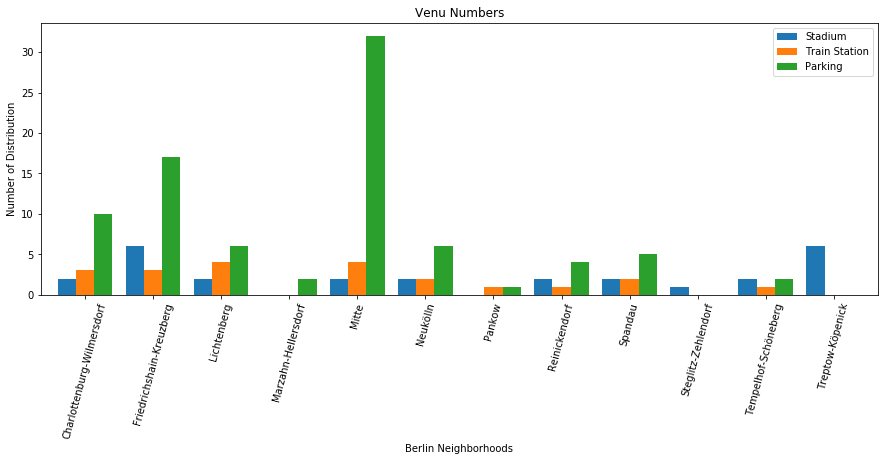

In [76]:
dfnb[['Stadium', 'Train Station', 'Parking']].plot(kind='bar', figsize=(15, 5), rot=75, width = 0.80)

plt.title('Venu Numbers')
plt.ylabel('Number of Distribution') # add y-label
plt.xlabel('Berlin Neighborhoods') # add x-label
plt.savefig('stadiumdist.png')
plt.show()

When we look at the figue, top three in Parking category are *Charlottenburg-Wilmersdorf*, *Friedrichshain-Kreuzberg* and *Mitte*. This means that these neighborhoods are very crowded central regions of the city.

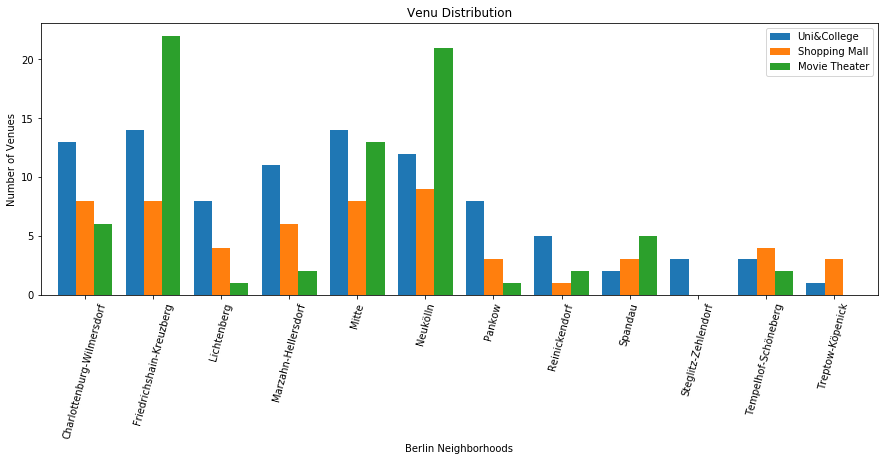

In [77]:
dfnb[['Uni&College', 'Shopping Mall', 'Movie Theater']].plot(kind='bar', figsize=(15, 5), rot=75, width = 0.80)

plt.title('Venu Distribution')
plt.ylabel('Number of Venues') # add y-label
plt.xlabel('Berlin Neighborhoods') # add x-label
plt.savefig('unidist.png')
plt.show()

When we look at this figure, top three neighborhoods in *Shopping Mall* and *Movie Theater* category are *Friedrichshain-Kreuzberg*, *Neukölln* and *Mitte*. This means that these neighborhoods are very crowded central regions of the city as well.

Let's examine the crimes data. As we can see data contains the number of events in the neighborhoods. On the other hand, the population of neighborhoods are not the same. So, to normalize the data with the population are much more significant for our case. Now, we create a new column which is calculated by dividing the number of crimes in 2019 to population of the corresponding neighborhood.

In [78]:
df_crimes=neighborhoods_8[['Borough', 'Population', 'Latitude', 'Longitude','Crime_numbers']]

In [79]:
df_crime_rates=df_crimes[['Crime_numbers']].div(df_crimes.Population, axis=0)
df_crime_rates

Crime_numbers
Neighborhood                             
Charlottenburg-Wilmersdorf       0.145875
Friedrichshain-Kreuzberg         0.208529
Lichtenberg                      0.094615
Marzahn-Hellersdorf              0.087285
Mitte                            0.219991
Neukölln                         0.131862
Pankow                           0.090188
Reinickendorf                    0.103540
Spandau                          0.101822
Steglitz-Zehlendorf              0.078341
Tempelhof-Schöneberg             0.113334
Treptow-Köpenick                 0.092218

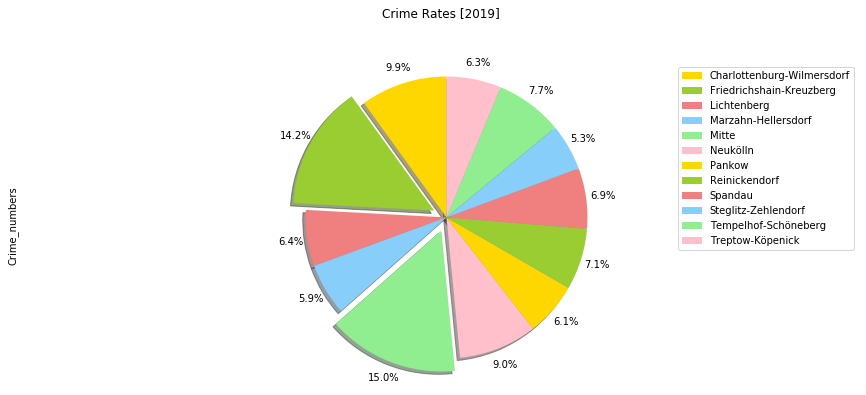

In [80]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0.1, 0, 0, 0.1, 0,0, 0, 0, 0, 0, 0] # ratio for each continent with which to offset each wedge.

df_crime_rates['Crime_numbers'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list,  
                            explode=explode_list
                            )

# scale the title up by 12% to match pctdistance
plt.title('Crime Rates [2019]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=dfnb.index, loc='upper right') 
plt.savefig('crimerates.png')
plt.show()

As we can see from the pie chart, *Charlottenburg-Wilmersdorf*, *Friedrichshain-Kreuzberg* and *Mitte* have the highest crime rates. If we combine with the above bart chart, we can say that these neighrborhoods are very crowded and central locations in Berlin.

In addition to this demographic data, we can generate age classification accorging to dining types (In open source there are some age classifications such as between 15 and 35 ages prefer fast-food etc.). Let's extract this information from the census data.
 - Ages 15-35 (Fast-food)
 - Ages 25-45 (Bar-Bistro)
 - Ages 30-50 (Casual dining)
 - Ages 35-65 (Fine dining)

In [81]:
df_dining=dfnb[['Population','Fast_Food_Population',
       'Bistro_Population', 'Casual_Dining_Population',
       'Fine_Dining_Population']]

In [82]:
df_dining

Population  Fast_Food_Population  \
Neighborhood                                                   
Charlottenburg-Wilmersdorf      341327                 83084   
Friedrichshain-Kreuzberg        289120                 97452   
Lichtenberg                     290493                 79074   
Marzahn-Hellersdorf             268739                 60501   
Mitte                           383457                133217   
Neukölln                        330786                 95775   
Pankow                          407039                103104   
Reinickendorf                   264826                 61167   
Spandau                         243080                 58342   
Steglitz-Zehlendorf             308077                 65581   
Tempelhof-Schöneberg            351429                 87453   
Treptow-Köpenick                269775                 63781   

                            Bistro_Population  Casual_Dining_Population  \
Neighborhood                                                              
Charlottenburg-Wilmersdorf              96713                    120460   
Friedrichshain-Kreuzberg               128671                    135440   
Lichtenberg                             95324                    105952   
Marzahn-Hellersdorf                     73247                     90986   
Mitte                                  151947                    156461   
Neukölln                               113358                    127092   
Pankow                                 143240                    178659   
Reinickendorf                           64847                     85339   
Spandau                                 62396                     80103   
Steglitz-Zehlendorf                     71007                     99449   
Tempelhof-Schöneberg                   100629                    125624   
Treptow-Köpenick                        79122                     98515   

                            Fine_Dining_Population  
Neighborhood                                        
Charlottenburg-Wilmersdorf                  140976  
Friedrichshain-Kreuzberg                    124220  
Lichtenberg                                 113319  
Marzahn-Hellersdorf                         114086  
Mitte                                       150576  
Neukölln                                    131353  
Pankow                                      180744  
Reinickendorf                               103746  
Spandau                                      95568  
Steglitz-Zehlendorf                         123102  
Tempelhof-Schöneberg                        145188  
Treptow-Köpenick                            110137

In [83]:
df_dining_pop_rates=df_dining[['Fast_Food_Population','Bistro_Population', 'Casual_Dining_Population','Fine_Dining_Population']].div(df_dining.Population, axis=0)
df_dining_pop_rates

Fast_Food_Population  Bistro_Population  \
Neighborhood                                                          
Charlottenburg-Wilmersdorf              0.243415           0.283344   
Friedrichshain-Kreuzberg                0.337064           0.445044   
Lichtenberg                             0.272206           0.328146   
Marzahn-Hellersdorf                     0.225129           0.272558   
Mitte                                   0.347411           0.396256   
Neukölln                                0.289538           0.342693   
Pankow                                  0.253303           0.351907   
Reinickendorf                           0.230971           0.244866   
Spandau                                 0.240012           0.256689   
Steglitz-Zehlendorf                     0.212872           0.230485   
Tempelhof-Schöneberg                    0.248850           0.286342   
Treptow-Köpenick                        0.236423           0.293289   

                            Casual_Dining_Population  Fine_Dining_Population  
Neighborhood                                                                  
Charlottenburg-Wilmersdorf                  0.352917                0.413023  
Friedrichshain-Kreuzberg                    0.468456                0.429649  
Lichtenberg                                 0.364732                0.390092  
Marzahn-Hellersdorf                         0.338566                0.424523  
Mitte                                       0.408027                0.392680  
Neukölln                                    0.384212                0.397094  
Pankow                                      0.438924                0.444046  
Reinickendorf                               0.322246                0.391752  
Spandau                                     0.329533                0.393155  
Steglitz-Zehlendorf                         0.322806                0.399582  
Tempelhof-Schöneberg                        0.357466                0.413136  
Treptow-Köpenick                            0.365175                0.408255

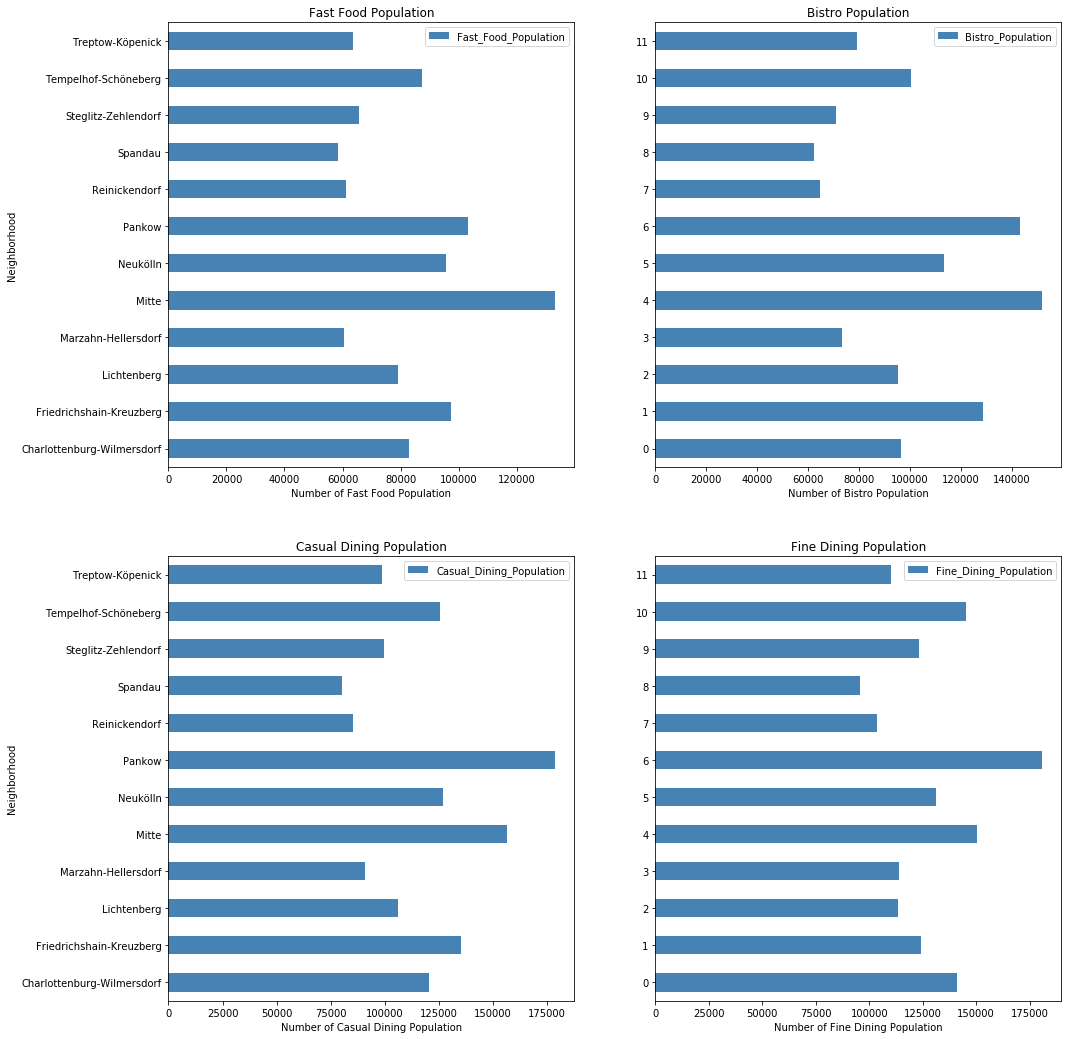

In [84]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (3 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (3 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(2, 2, 3) # add subplot 2 (3 row, 2 columns, second plot). See tip below**
ax3 = fig.add_subplot(2, 2, 4) # add subplot 2 (3 row, 2 columns, second plot). See tip below**
# Subplot 1: Box plot
#df_CI.plot(kind='box', color='blue', vert=False, figsize=(12, 6), ax=ax0) # add to subplot 1
df_dining[['Fast_Food_Population']].plot(kind='barh', figsize=(16, 18), color='steelblue', ax=ax0)
ax0.set_title('Fast Food Population')
ax0.set_xlabel('Number of Fast Food Population')
#ax0.set_ylabel('Neighborhoods')

# Subplot 2: Line plot
df_dining[['Bistro_Population']].plot(kind='barh', figsize=(16, 18), color='steelblue', use_index=False, ax=ax1)
ax1.set_title('Bistro Population')
ax1.set_xlabel('Number of Bistro Population')

# Subplot 3: Line plot
df_dining[['Casual_Dining_Population']].plot(kind='barh', figsize=(16, 18), color='steelblue', ax=ax2)
ax2.set_title('Casual Dining Population')
ax2.set_xlabel('Number of Casual Dining Population')

# Subplot 4: Line plot
df_dining[['Fine_Dining_Population']].plot(kind='barh', figsize=(16, 18), color='steelblue',use_index=False, ax=ax3)
ax3.set_title('Fine Dining Population')
ax3.set_xlabel('Number of Fine Dining Population')
plt.savefig('food.png')
plt.show()

Let's examine the figures. The first and second figure show as *Mitte*, *Pankow* and *Friedrichshain-Kreuzberg* are promising locations for fas food, casual dining and bistro type restaurants from population point of view. Likewise,  *Mitte*, *Pankow* and *Tempelhof-Schönnenberg* are preferable for Fine Dining restaurant business

####  Now, we explore the details of restaurants venues of Berlin

Let's create a function to examine all neighborhoods of Berlin

In [85]:
categoryIdchoose='4d4b7105d754a06374d81259' #food category in Foursquare API data

In [86]:
def getNearbyVenueProperties(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name, lat, lng)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&intent={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            intent,
            lat, 
            lng, 
            radius,
            categoryIdchoose,
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['id'],
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['location']['distance'], 
            v['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue Id', 
                  'Venue',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Distance',
                  'Venue Category']

    
    return(nearby_venues)

In [87]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
intent = 'browse'
neighborhood_venues = getNearbyVenueProperties(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Charlottenburg-Wilmersdorf 52.497058 13.29649
Friedrichshain-Kreuzberg 52.5015 13.43512
Lichtenberg 52.514581 13.498392
Marzahn-Hellersdorf 52.53972 13.58428
Mitte 52.51674 13.36679
Neukölln 52.4802 13.43364
Pankow 52.57105 13.40497
Reinickendorf 52.56755 13.33165
Spandau 52.55009 13.200356
Steglitz-Zehlendorf 52.44364 13.22908
Tempelhof-Schöneberg 52.44763 13.38535
Treptow-Köpenick 52.445817 13.57458


In [88]:
neighborhood_venues['Venue Category'].unique()

array(['Bakery', 'Grocery Store', 'Organic Grocery', 'Seafood Restaurant',
       'Café', 'German Restaurant', 'Thai Restaurant',
       'Italian Restaurant', 'Doner Restaurant', 'Gourmet Shop',
       'Snack Place', 'Breakfast Spot', 'Fast Food Restaurant',
       'Japanese Restaurant', 'Chinese Restaurant', 'Steakhouse',
       'Burger Joint', 'Sushi Restaurant', 'French Restaurant',
       'Greek Restaurant', 'Food Court', 'Coffee Shop', 'Donut Shop',
       'Pastry Shop', 'Modern European Restaurant', 'Bagel Shop',
       'Kofte Place', 'Pizza Place', 'Falafel Restaurant',
       'Middle Eastern Restaurant', 'Vietnamese Restaurant', 'Gastropub',
       'Ice Cream Shop', 'Korean Restaurant', 'Sandwich Place',
       'Lebanese Restaurant', 'Ramen Restaurant', 'Mexican Restaurant',
       'Tea Room', 'Deli / Bodega', 'Pakistani Restaurant', 'Restaurant',
       'Asian Restaurant', 'Turkish Restaurant', 'BBQ Joint',
       'Indian Restaurant', 'Diner', 'Beer Garden', 'Persian Restauran

Let's exclude non-restaurants/non-food serving places from the list for our restasourant business target.

In [89]:
L= ['Bakery', 'Grocery Store', 'Organic Grocery', 'Café', 'Coffee Shop', 'Donut Shop','Pastry Shop', 'Bagel Shop', 
       'Modern European Restaurant', 'Ice Cream Shop', 'Cafeteria', 'Tea Room',
       'Beer Garden', 'Irish Pub', 'Juice Bar', 'Chocolate Shop','Convenience Store','Cupcake Shop',
       'Wine Bar', 'Fried Chicken Joint','Butcher', 'Dessert Shop', 'Sports Bar', 'Gas Station',
       'Frozen Yogurt Shop','Food Truck']

neighborhood_venues = neighborhood_venues[~neighborhood_venues['Venue Category'].isin(L)]
neighborhood_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
3   Charlottenburg-Wilmersdorf              52.497058                13.29649   
7   Charlottenburg-Wilmersdorf              52.497058                13.29649   
8   Charlottenburg-Wilmersdorf              52.497058                13.29649   
10  Charlottenburg-Wilmersdorf              52.497058                13.29649   
11  Charlottenburg-Wilmersdorf              52.497058                13.29649   

                    Venue Id               Venue  Venue Latitude  \
3   4e5f988a18a8bc94706b4a2f             NORDSEE       52.509274   
7   56841abb498e4abb4bcdca8d  Landhaus Grunewald       52.483571   
8   5c3f5bb37c891c002d9a7a5e            Thai-Art       52.486654   
10  4c0d2c6a98102d7fe2c6e106          Cantinetta       52.508896   
11  516c237ee4b056efa6de5558      Istanbul Grill       52.486742   

    Venue Longitude  Venue Distance      Venue Category  
3         13.304722            1469  Seafood Restaurant  
7         13.282353            1781   German Restaurant  
8         13.319444            1939     Thai Restaurant  
10        13.307012            1498  Italian Restaurant  
11        13.320036            1966    Doner Restaurant

In [90]:
neighborhood_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                
Charlottenburg-Wilmersdorf                     20                      20   
Friedrichshain-Kreuzberg                       28                      28   
Lichtenberg                                     4                       4   
Marzahn-Hellersdorf                            34                      34   
Mitte                                          21                      21   
Neukölln                                       27                      27   
Pankow                                         18                      18   
Reinickendorf                                  30                      30   
Spandau                                        33                      33   
Steglitz-Zehlendorf                            35                      35   
Tempelhof-Schöneberg                           28                      28   
Treptow-Köpenick                               32                      32   

                            Venue Id  Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                                   
Charlottenburg-Wilmersdorf        20     20              20               20   
Friedrichshain-Kreuzberg          28     28              28               28   
Lichtenberg                        4      4               4                4   
Marzahn-Hellersdorf               34     34              34               34   
Mitte                             21     21              21               21   
Neukölln                          27     27              27               27   
Pankow                            18     18              18               18   
Reinickendorf                     30     30              30               30   
Spandau                           33     33              33               33   
Steglitz-Zehlendorf               35     35              35               35   
Tempelhof-Schöneberg              28     28              28               28   
Treptow-Köpenick                  32     32              32               32   

                            Venue Distance  Venue Category  
Neighborhood                                                
Charlottenburg-Wilmersdorf              20              20  
Friedrichshain-Kreuzberg                28              28  
Lichtenberg                              4               4  
Marzahn-Hellersdorf                     34              34  
Mitte                                   21              21  
Neukölln                                27              27  
Pankow                                  18              18  
Reinickendorf                           30              30  
Spandau                                 33              33  
Steglitz-Zehlendorf                     35              35  
Tempelhof-Schöneberg                    28              28  
Treptow-Köpenick                        32              32

In [91]:
neighborhood_venues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 3 to 527
Data columns (total 9 columns):
Neighborhood              310 non-null object
Neighborhood Latitude     310 non-null float64
Neighborhood Longitude    310 non-null float64
Venue Id                  310 non-null object
Venue                     310 non-null object
Venue Latitude            310 non-null float64
Venue Longitude           310 non-null float64
Venue Distance            310 non-null int64
Venue Category            310 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 24.2+ KB


In [92]:
neighborhood_venues['Venue Category'].unique()

array(['Seafood Restaurant', 'German Restaurant', 'Thai Restaurant',
       'Italian Restaurant', 'Doner Restaurant', 'Gourmet Shop',
       'Snack Place', 'Breakfast Spot', 'Fast Food Restaurant',
       'Japanese Restaurant', 'Chinese Restaurant', 'Steakhouse',
       'Burger Joint', 'Sushi Restaurant', 'French Restaurant',
       'Greek Restaurant', 'Food Court', 'Kofte Place', 'Pizza Place',
       'Falafel Restaurant', 'Middle Eastern Restaurant',
       'Vietnamese Restaurant', 'Gastropub', 'Korean Restaurant',
       'Sandwich Place', 'Lebanese Restaurant', 'Ramen Restaurant',
       'Mexican Restaurant', 'Deli / Bodega', 'Pakistani Restaurant',
       'Restaurant', 'Asian Restaurant', 'Turkish Restaurant',
       'BBQ Joint', 'Indian Restaurant', 'Diner', 'Persian Restaurant',
       'Vegetarian / Vegan Restaurant', 'Bistro', 'Bavarian Restaurant',
       'Currywurst Joint', 'Brasserie', 'Cocktail Bar',
       'Trattoria/Osteria', 'Kebab Restaurant', 'Argentinian Restaurant',
 

In [93]:
neighborhood_venues.to_csv (r'export_neighborhood_venues.csv', header=True)
df=neighborhood_venues

In [94]:
# We can examine the venue categories of each neighborhoods using groupby method. 
# Let's see how venue kategories are distributed among the neighborhoods.
# to look at the list please remove the  '#' Character from the below line 

# df.groupby(['Venue Category','Neighborhood']).count()     

#### Let's find out how many unique categories can be obtained from all the returned venues

In [95]:
print('There are {} uniques categories.'.format(len(neighborhood_venues['Venue Category'].unique())))
df=df.reset_index()
df.info()

There are 56 uniques categories.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 10 columns):
index                     310 non-null int64
Neighborhood              310 non-null object
Neighborhood Latitude     310 non-null float64
Neighborhood Longitude    310 non-null float64
Venue Id                  310 non-null object
Venue                     310 non-null object
Venue Latitude            310 non-null float64
Venue Longitude           310 non-null float64
Venue Distance            310 non-null int64
Venue Category            310 non-null object
dtypes: float64(4), int64(2), object(4)
memory usage: 24.3+ KB


we can get the details of each venue in our DataFrame. **These data is in a restricted part of the Foursquare API.** Restrictions apply based on your account type. On the other hand, we can make 500 API calls per day for venue details freely. So, This opportunity provides us valuable information such as *'price'*, *'rating'* and *'likes'* keys for restaurant categories. These categories are defined in API reference as follows: 

*price*:	An object containing the price tier from 1 (least pricey) - 4 (most pricey) and a message describing the price tier.

*rating*:	Numerical rating of the venue (0 through 10). Returned as part of an explore result, excluded in search results. Not all venues will have a rating.

*likes*:	The count of users who have liked this venue, and groups containing any friends and others who have liked it. The groups included are subject to change.

**Important note:You can get venue details information using your own creditentials and can make 500 API calls per day** and it requires credit card information for registration. If you have this type of account, please change the following cell type from 'Raw' to 'Code'

In [96]:
df.head(5)

index                Neighborhood  Neighborhood Latitude  \
0      3  Charlottenburg-Wilmersdorf              52.497058   
1      7  Charlottenburg-Wilmersdorf              52.497058   
2      8  Charlottenburg-Wilmersdorf              52.497058   
3     10  Charlottenburg-Wilmersdorf              52.497058   
4     11  Charlottenburg-Wilmersdorf              52.497058   

   Neighborhood Longitude                  Venue Id               Venue  \
0                13.29649  4e5f988a18a8bc94706b4a2f             NORDSEE   
1                13.29649  56841abb498e4abb4bcdca8d  Landhaus Grunewald   
2                13.29649  5c3f5bb37c891c002d9a7a5e            Thai-Art   
3                13.29649  4c0d2c6a98102d7fe2c6e106          Cantinetta   
4                13.29649  516c237ee4b056efa6de5558      Istanbul Grill   

   Venue Latitude  Venue Longitude  Venue Distance      Venue Category  
0       52.509274        13.304722            1469  Seafood Restaurant  
1       52.483571        13.282353            1781   German Restaurant  
2       52.486654        13.319444            1939     Thai Restaurant  
3       52.508896        13.307012            1498  Italian Restaurant  
4       52.486742        13.320036            1966    Doner Restaurant

**Important note:You can get venue details information using your own creditentials and can make 500 API calls per day** and it requires credit card information for registration. If you have difficulty with that, you can use local 'csv' file by running the following cell.

In [97]:
# If the Foursquare API creditentials are given at the begining of this Notebook this cell 
# must be be changed from 'Code' to 'Raw' or signed as '#' or deleted.

df=pd.read_csv('foodvenuedetailsinberlin.csv')

In [98]:
neighborhoods_foodmenudetails= pd.merge(df, neighborhoods_8, on='Neighborhood',how='left')
neighborhoods_foodmenudetails.head(5)

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  index  \
0           0             0               0      3   
1           1             1               1      4   
2           2             2               2      7   
3           3             3               3      9   
4           4             4               4     10   

                 Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Charlottenburg-Wilmersdorf              52.497058                13.29649   
1  Charlottenburg-Wilmersdorf              52.497058                13.29649   
2  Charlottenburg-Wilmersdorf              52.497058                13.29649   
3  Charlottenburg-Wilmersdorf              52.497058                13.29649   
4  Charlottenburg-Wilmersdorf              52.497058                13.29649   

                   Venue Id               Venue  Venue Latitude  \
0  56841abb498e4abb4bcdca8d  Landhaus Grunewald       52.483571   
1  5810973938fa6ecbf4f5249c            Benedict       52.497324   
2  516c237ee4b056efa6de5558      Istanbul Grill       52.486742   
3  4c8aa11c1eafb1f758077c35     XL Döner Sophie       52.511749   
4  5c3f5bb37c891c002d9a7a5e            Thai-Art       52.486654   

   Venue Longitude  Venue Distance     Venue Category  Price  Rating  Likes  \
0        13.282353            1781  German Restaurant      2     7.2      8   
1        13.323777            1849     Breakfast Spot      1     8.2    389   
2        13.320036            1966   Doner Restaurant      0     7.1      7   
3        13.297073            1635   Doner Restaurant      0     7.3     27   
4        13.319444            1939    Thai Restaurant      1     8.3      6   

  Borough  Population   Latitude  Longitude  Uni&College  Shopping Mall  \
0  Berlin      341327  52.497058   13.29649           13              8   
1  Berlin      341327  52.497058   13.29649           13              8   
2  Berlin      341327  52.497058   13.29649           13              8   
3  Berlin      341327  52.497058   13.29649           13              8   
4  Berlin      341327  52.497058   13.29649           13              8   

   Movie Theater  Stadium  Train Station  Parking  Crime_numbers  \
0              6        2              3       10          49791   
1              6        2              3       10          49791   
2              6        2              3       10          49791   
3              6        2              3       10          49791   
4              6        2              3       10          49791   

   Male_Population  Female_Population  Foreign_Population  German_Population  \
0           165435             175892               85244             256083   
1           165435             175892               85244             256083   
2           165435             175892               85244             256083   
3           165435             175892               85244             256083   
4           165435             175892               85244             256083   

   Fast_Food_Population  Bistro_Population  Casual_Dining_Population  \
0                 83084              96713                    120460   
1                 83084              96713                    120460   
2                 83084              96713                    120460   
3                 83084              96713                    120460   
4                 83084              96713                    120460   

   Fine_Dining_Population  
0                  140976  
1                  140976  
2                  140976  
3                  140976  
4                  140976

In [99]:
neighborhoods_foodmenudetails.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'index', 'Neighborhood',
       'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Id', 'Venue',
       'Venue Latitude', 'Venue Longitude', 'Venue Distance', 'Venue Category',
       'Price', 'Rating', 'Likes', 'Borough', 'Population', 'Latitude',
       'Longitude', 'Uni&College', 'Shopping Mall', 'Movie Theater', 'Stadium',
       'Train Station', 'Parking', 'Crime_numbers', 'Male_Population',
       'Female_Population', 'Foreign_Population', 'German_Population',
       'Fast_Food_Population', 'Bistro_Population', 'Casual_Dining_Population',
       'Fine_Dining_Population'],
      dtype='object')

## 4. Analyze and Cluster the Neighborhoods

In [100]:
# one hot encoding
neighborhood_onehot = pd.get_dummies(neighborhood_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
neighborhood_onehot['Neighborhood'] = neighborhood_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [neighborhood_onehot.columns[-1]] + list(neighborhood_onehot.columns[:-1])
neighborhood_onehot = neighborhood_onehot[fixed_columns]

neighborhood_onehot.head()

Neighborhood  Argentinian Restaurant  Asian Restaurant  \
3   Charlottenburg-Wilmersdorf                       0                 0   
7   Charlottenburg-Wilmersdorf                       0                 0   
8   Charlottenburg-Wilmersdorf                       0                 0   
10  Charlottenburg-Wilmersdorf                       0                 0   
11  Charlottenburg-Wilmersdorf                       0                 0   

    BBQ Joint  Bavarian Restaurant  Bistro  Brasserie  Breakfast Spot  \
3           0                    0       0          0               0   
7           0                    0       0          0               0   
8           0                    0       0          0               0   
10          0                    0       0          0               0   
11          0                    0       0          0               0   

    Brewery  Burger Joint  Burrito Place  Chinese Restaurant  Cocktail Bar  \
3         0             0              0                   0             0   
7         0             0              0                   0             0   
8         0             0              0                   0             0   
10        0             0              0                   0             0   
11        0             0              0                   0             0   

    Currywurst Joint  Deli / Bodega  Diner  Doner Restaurant  \
3                  0              0      0                 0   
7                  0              0      0                 0   
8                  0              0      0                 0   
10                 0              0      0                 0   
11                 0              0      0                 1   

    Eastern European Restaurant  Falafel Restaurant  Fast Food Restaurant  \
3                             0                   0                     0   
7                             0                   0                     0   
8                             0                   0                     0   
10                            0                   0                     0   
11                            0                   0                     0   

    Food & Drink Shop  Food Court  Food Stand  French Restaurant  Gastropub  \
3                   0           0           0                  0          0   
7                   0           0           0                  0          0   
8                   0           0           0                  0          0   
10                  0           0           0                  0          0   
11                  0           0           0                  0          0   

    German Restaurant  Gourmet Shop  Greek Restaurant  Hot Dog Joint  \
3                   0             0                 0              0   
7                   1             0                 0              0   
8                   0             0                 0              0   
10                  0             0                 0              0   
11                  0             0                 0              0   

    Indian Restaurant  Italian Restaurant  Japanese Restaurant  \
3                   0                   0                    0   
7                   0                   0                    0   
8                   0                   0                    0   
10                  0                   1                    0   
11                  0                   0                    0   

    Kebab Restaurant  Kofte Place  Korean Restaurant  Lebanese Restaurant  \
3                  0            0                  0                    0   
7                  0            0                  0                    0   
8                  0            0                  0                    0   
10                 0            0                  0                    0   
11                 0            0                  0                    0   

    Mediterranean Restaurant  Mexican

And let's examine the new dataframe size.

In [101]:
neighborhood_onehot.to_csv (r'export_dataframe.csv', header=True)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [102]:
neighborhood_grouped = neighborhood_onehot.groupby('Neighborhood').mean().reset_index()
print(neighborhood_grouped)

                  Neighborhood  Argentinian Restaurant  Asian Restaurant  \
0   Charlottenburg-Wilmersdorf                0.000000          0.000000   
1     Friedrichshain-Kreuzberg                0.000000          0.000000   
2                  Lichtenberg                0.000000          0.000000   
3          Marzahn-Hellersdorf                0.000000          0.058824   
4                        Mitte                0.000000          0.000000   
5                     Neukölln                0.000000          0.000000   
6                       Pankow                0.000000          0.000000   
7                Reinickendorf                0.033333          0.000000   
8                      Spandau                0.030303          0.060606   
9          Steglitz-Zehlendorf                0.000000          0.057143   
10        Tempelhof-Schöneberg                0.000000          0.035714   
11            Treptow-Köpenick                0.000000          0.062500   

    BBQ Joi

#### Let's confirm the new size

In [103]:
neighborhood_grouped.shape

(12, 57)

#### Let's print each neighborhood along with the top 5 most common venues

In [104]:
num_top_venues = 5

for hood in neighborhood_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = neighborhood_grouped[neighborhood_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Charlottenburg-Wilmersdorf----
                 venue  freq
0  Japanese Restaurant  0.10
1     Sushi Restaurant  0.10
2          Snack Place  0.10
3     Doner Restaurant  0.10
4   Chinese Restaurant  0.05


----Friedrichshain-Kreuzberg----
                       venue  freq
0                Pizza Place  0.14
1         Falafel Restaurant  0.11
2      Vietnamese Restaurant  0.07
3  Middle Eastern Restaurant  0.07
4             Breakfast Spot  0.07


----Lichtenberg----
                   venue  freq
0  Vietnamese Restaurant  0.75
1            Pizza Place  0.25
2       Asian Restaurant  0.00
3    Japanese Restaurant  0.00
4       Kebab Restaurant  0.00


----Marzahn-Hellersdorf----
                venue  freq
0         Snack Place  0.12
1  Italian Restaurant  0.12
2    Doner Restaurant  0.12
3          Restaurant  0.09
4           BBQ Joint  0.06


----Mitte----
                           venue  freq
0           Fast Food Restaurant  0.14
1                 Sandwich Place  0.10
2      

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [105]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [106]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = neighborhood_grouped['Neighborhood']
for ind in np.arange(neighborhood_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(neighborhood_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood  1st Most Common Venue 2nd Most Common Venue  \
0   Charlottenburg-Wilmersdorf       Doner Restaurant   Japanese Restaurant   
1     Friedrichshain-Kreuzberg            Pizza Place    Falafel Restaurant   
2                  Lichtenberg  Vietnamese Restaurant           Pizza Place   
3          Marzahn-Hellersdorf     Italian Restaurant      Doner Restaurant   
4                        Mitte   Fast Food Restaurant        Sandwich Place   
5                     Neukölln            Pizza Place        Breakfast Spot   
6                       Pankow     Italian Restaurant     Trattoria/Osteria   
7                Reinickendorf   Fast Food Restaurant      Doner Restaurant   
8                      Spandau     Turkish Restaurant    Italian Restaurant   
9          Steglitz-Zehlendorf     Italian Restaurant     German Restaurant   
10        Tempelhof-Schöneberg             Restaurant     Indian Restaurant   
11            Treptow-Köpenick      German Restaurant    Italian Restaurant   

            3rd Most Common Venue      4th Most Common Venue  \
0                Sushi Restaurant                Snack Place   
1           Vietnamese Restaurant             Breakfast Spot   
2                Asian Restaurant                  BBQ Joint   
3                     Snack Place                 Restaurant   
4   Vegetarian / Vegan Restaurant          German Restaurant   
5               Korean Restaurant  Middle Eastern Restaurant   
6            Fast Food Restaurant               Burger Joint   
7               Trattoria/Osteria         Italian Restaurant   
8            Fast Food Restaurant           Asian Restaurant   
9                Greek Restaurant           Asian Restaurant   
10                        Taverna          German Restaurant   
11           Fast Food Restaurant           Greek Restaurant   

   5th Most Common Venue  
0     Chinese Restaurant  
1           Burger Joint  
2      German Restaurant  
3              Gastropub  
4           Burger Joint  
5                 Bistro  
6         Breakfast Spot  
7             Restaurant  
8      German Restaurant  
9      Trattoria/Osteria  
10      Doner Restaurant  
11      Doner Restaurant

<a id='item4'></a>

Let's run *k*-means to cluster the neighborhood into 5 clusters.

In [107]:
# set number of clusters
kclusters = 5

neighborhood_grouped_clustering = neighborhood_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighborhood_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_

array([2, 3, 1, 2, 0, 3, 2, 2, 2, 4, 2, 4])

In [108]:
# add clustering labels
# neighborhoods_venues_sorted=neighborhoods_venues_sorted.drop('Cluster Labels', 1)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

neighborhoods_merged = neighborhoods

Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [109]:
# merge neighborhoods_grouped with neighborhoods to add latitude/longitude for each neighborhood
neighborhoods_merged = neighborhoods_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

neighborhoods_merged # check the last columns!

Borough                Neighborhood  Population   Latitude  Longitude  \
0   Berlin  Charlottenburg-Wilmersdorf      341327  52.497058  13.296490   
1   Berlin    Friedrichshain-Kreuzberg      289120  52.501500  13.435120   
2   Berlin                 Lichtenberg      290493  52.514581  13.498392   
3   Berlin         Marzahn-Hellersdorf      268739  52.539720  13.584280   
4   Berlin                       Mitte      383457  52.516740  13.366790   
5   Berlin                    Neukölln      330786  52.480200  13.433640   
6   Berlin                      Pankow      407039  52.571050  13.404970   
7   Berlin               Reinickendorf      264826  52.567550  13.331650   
8   Berlin                     Spandau      243080  52.550090  13.200356   
9   Berlin         Steglitz-Zehlendorf      308077  52.443640  13.229080   
10  Berlin        Tempelhof-Schöneberg      351429  52.447630  13.385350   
11  Berlin            Treptow-Köpenick      269775  52.445817  13.574580   

    Cluster Labels  1st Most Common Venue 2nd Most Common Venue  \
0                2       Doner Restaurant   Japanese Restaurant   
1                3            Pizza Place    Falafel Restaurant   
2                1  Vietnamese Restaurant           Pizza Place   
3                2     Italian Restaurant      Doner Restaurant   
4                0   Fast Food Restaurant        Sandwich Place   
5                3            Pizza Place        Breakfast Spot   
6                2     Italian Restaurant     Trattoria/Osteria   
7                2   Fast Food Restaurant      Doner Restaurant   
8                2     Turkish Restaurant    Italian Restaurant   
9                4     Italian Restaurant     German Restaurant   
10               2             Restaurant     Indian Restaurant   
11               4      German Restaurant    Italian Restaurant   

            3rd Most Common Venue      4th Most Common Venue  \
0                Sushi Restaurant                Snack Place   
1           Vietnamese Restaurant             Breakfast Spot   
2                Asian Restaurant                  BBQ Joint   
3                     Snack Place                 Restaurant   
4   Vegetarian / Vegan Restaurant          German Restaurant   
5               Korean Restaurant  Middle Eastern Restaurant   
6            Fast Food Restaurant               Burger Joint   
7               Trattoria/Osteria         Italian Restaurant   
8            Fast Food Restaurant           Asian Restaurant   
9                Greek Restaurant           Asian Restaurant   
10                        Taverna          German Restaurant   
11           Fast Food Restaurant           Greek Restaurant   

   5th Most Common Venue  
0     Chinese Restaurant  
1           Burger Joint  
2      German Restaurant  
3              Gastropub  
4           Burger Joint  
5                 Bistro  
6         Breakfast Spot  
7             Restaurant  
8      German Restaurant  
9      Trattoria/Osteria  
10      Doner Restaurant  
11      Doner Restaurant

Finally, let's visualize the resulting clusters

In [110]:
with open('bezirksgrenzen.geojson') as f:
    layer_neighborhoods=json.load(f)
# create map

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
folium.raster_layers.TileLayer('CartoDB Positron').add_to(map_clusters)
for i in layer_neighborhoods['features']:
    i['id'] = i['properties']['Gemeinde_name']
   
# choropleth
folium.Choropleth(
    geo_data=layer_neighborhoods,
    name='choropleth',
    data=neighborhoods,
    columns=['Neighborhood', 'Population'],
    # see folium.Choropleth? for details on key_on
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Population',
    highlight=True
).add_to(map_clusters)    
   
    # plugin for mini map
minimap = plugins.MiniMap(toggle_display=True)

# add minimap to map
map_clusters.add_child(minimap)

# add scroll zoom toggler to map
plugins.ScrollZoomToggler().add_to(map_clusters)

# add full screen button to map
plugins.Fullscreen(position='topright').add_to(map_clusters)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_merged['Latitude'], neighborhoods_merged['Longitude'], neighborhoods_merged['Neighborhood'], neighborhoods_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

#### Cluster 1

In [111]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 0, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
4        Mitte               0  Fast Food Restaurant        Sandwich Place   

           3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
4  Vegetarian / Vegan Restaurant     German Restaurant          Burger Joint

#### Cluster 2

In [112]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 1, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]

Neighborhood  Cluster Labels  1st Most Common Venue 2nd Most Common Venue  \
2  Lichtenberg               1  Vietnamese Restaurant           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
2      Asian Restaurant             BBQ Joint     German Restaurant

#### Cluster 3

In [113]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 2, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
0   Charlottenburg-Wilmersdorf               2      Doner Restaurant   
3          Marzahn-Hellersdorf               2    Italian Restaurant   
6                       Pankow               2    Italian Restaurant   
7                Reinickendorf               2  Fast Food Restaurant   
8                      Spandau               2    Turkish Restaurant   
10        Tempelhof-Schöneberg               2            Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0    Japanese Restaurant      Sushi Restaurant           Snack Place   
3       Doner Restaurant           Snack Place            Restaurant   
6      Trattoria/Osteria  Fast Food Restaurant          Burger Joint   
7       Doner Restaurant     Trattoria/Osteria    Italian Restaurant   
8     Italian Restaurant  Fast Food Restaurant      Asian Restaurant   
10     Indian Restaurant               Taverna     German Restaurant   

   5th Most Common Venue  
0     Chinese Restaurant  
3              Gastropub  
6         Breakfast Spot  
7             Restaurant  
8      German Restaurant  
10      Doner Restaurant

#### Cluster 4

In [114]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 3, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
1  Friedrichshain-Kreuzberg               3           Pizza Place   
5                  Neukölln               3           Pizza Place   

  2nd Most Common Venue  3rd Most Common Venue      4th Most Common Venue  \
1    Falafel Restaurant  Vietnamese Restaurant             Breakfast Spot   
5        Breakfast Spot      Korean Restaurant  Middle Eastern Restaurant   

  5th Most Common Venue  
1          Burger Joint  
5                Bistro

#### Cluster 5

In [115]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 4, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
9   Steglitz-Zehlendorf               4    Italian Restaurant   
11     Treptow-Köpenick               4     German Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
9      German Restaurant      Greek Restaurant      Asian Restaurant   
11    Italian Restaurant  Fast Food Restaurant      Greek Restaurant   

   5th Most Common Venue  
9      Trattoria/Osteria  
11      Doner Restaurant

## 5. Analyze and Make Prediction Models

Lets start with cleaning the dataframe and drop unnecessary columns for the model predictions

In [116]:
neighborhoods_foodmenudetails.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'index', 'Neighborhood',
       'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Id', 'Venue',
       'Venue Latitude', 'Venue Longitude', 'Venue Distance', 'Venue Category',
       'Price', 'Rating', 'Likes', 'Borough', 'Population', 'Latitude',
       'Longitude', 'Uni&College', 'Shopping Mall', 'Movie Theater', 'Stadium',
       'Train Station', 'Parking', 'Crime_numbers', 'Male_Population',
       'Female_Population', 'Foreign_Population', 'German_Population',
       'Fast_Food_Population', 'Bistro_Population', 'Casual_Dining_Population',
       'Fine_Dining_Population'],
      dtype='object')

In [117]:
neighborhoods_foodmenudetails=neighborhoods_foodmenudetails[['Neighborhood',
       'Venue Id', 'Venue','Venue Category', 'Price', 'Rating', 'Likes','Population', 'Uni&College', 'Shopping Mall',
       'Movie Theater', 'Stadium', 'Train Station', 'Parking', 'Crime_numbers',
       'Male_Population', 'Female_Population', 'Foreign_Population',
       'German_Population']]

In [118]:
neighborhoods_foodmenudetails.reset_index()
neighborhoods_foodmenudetails.head()

Neighborhood                  Venue Id               Venue  \
0  Charlottenburg-Wilmersdorf  56841abb498e4abb4bcdca8d  Landhaus Grunewald   
1  Charlottenburg-Wilmersdorf  5810973938fa6ecbf4f5249c            Benedict   
2  Charlottenburg-Wilmersdorf  516c237ee4b056efa6de5558      Istanbul Grill   
3  Charlottenburg-Wilmersdorf  4c8aa11c1eafb1f758077c35     XL Döner Sophie   
4  Charlottenburg-Wilmersdorf  5c3f5bb37c891c002d9a7a5e            Thai-Art   

      Venue Category  Price  Rating  Likes  Population  Uni&College  \
0  German Restaurant      2     7.2      8      341327           13   
1     Breakfast Spot      1     8.2    389      341327           13   
2   Doner Restaurant      0     7.1      7      341327           13   
3   Doner Restaurant      0     7.3     27      341327           13   
4    Thai Restaurant      1     8.3      6      341327           13   

   Shopping Mall  Movie Theater  Stadium  Train Station  Parking  \
0              8              6        2              3       10   
1              8              6        2              3       10   
2              8              6        2              3       10   
3              8              6        2              3       10   
4              8              6        2              3       10   

   Crime_numbers  Male_Population  Female_Population  Foreign_Population  \
0          49791           165435             175892               85244   
1          49791           165435             175892               85244   
2          49791           165435             175892               85244   
3          49791           165435             175892               85244   
4          49791           165435             175892               85244   

   German_Population  
0             256083  
1             256083  
2             256083  
3             256083  
4             256083

We can see the venues grouped by 'Venue Category' in each neighborhood to be able to look at the weight of each category

In [119]:
neighborhoods_foodmenudetails.groupby(['Venue Category']).count()

Neighborhood  Venue Id  Venue  Price  Rating  \
Venue Category                                                                
African Restaurant                        1         1      1      1       1   
American Restaurant                       1         1      1      1       1   
Argentinian Restaurant                    1         1      1      1       1   
Asian Restaurant                         10        10     10     10      10   
BBQ Joint                                 9         9      9      9       9   
Bavarian Restaurant                       1         1      1      1       1   
Bistro                                    1         1      1      1       1   
Brasserie                                 1         1      1      1       1   
Breakfast Spot                           14        14     14     14      14   
Brewery                                   2         2      2      2       2   
Burger Joint                             15        15     15     15      15   
Burrito Place                             1         1      1      1       1   
Caucasian Restaurant                      1         1      1      1       1   
Chinese Restaurant                        7         7      7      7       7   
Currywurst Joint                          2         2      2      2       2   
Deli / Bodega                             2         2      2      2       2   
Diner                                     3         3      3      3       3   
Doner Restaurant                         17        17     17     17      17   
Dumpling Restaurant                       1         1      1      1       1   
Eastern European Restaurant               2         2      2      2       2   
Falafel Restaurant                        4         4      4      4       4   
Fast Food Restaurant                     17        17     17     17      17   
Food & Drink Shop                         1         1      1      1       1   
Food Court                                1         1      1      1       1   
French Restaurant                         3         3      3      3       3   
Gastropub                                 6         6      6      6       6   
German Restaurant                        23        23     23     23      23   
Gourmet Shop                              3         3      3      3       3   
Greek Restaurant                         10        10     10     10      10   
Hot Dog Joint                             1         1      1      1       1   
Indian Restaurant                         8         8      8      8       8   
Italian Restaurant                       25        25     25     25      25   
Japanese Restaurant                       3         3      3      3       3   
Kebab Restaurant                          1         1      1      1       1   
Kofte Place                               2         2      2      2       2   
Korean Restaurant                         6         6      6      6       6   
Lebanese Restaurant                       2         2      2      2       2   
Mediterranean Restaurant                  2         2      2      2       2   
Mexican Restaurant                        2         2      2      2       2   
Middle Eastern Restaurant                 7         7      7      7       7   
Noodle House                              2         2      2      2       2   
Pakistani Restaurant                      2         2      2      2       2   
Pizza Place                              16        16     16     16      16   
Ramen Restaurant                          4         4      4      4       4   
Restaurant                               16        16     16     16      16   
Russian Restaurant                        1         1      1      1       1   
Salad Place                               2         2      2      2       2   
Sandwich Place                            6         6      6      6       6   
Schnitzel Restaurant                      1         1      1      1       1   
Se

In [120]:
neighborhoods_foodmenudetails.groupby(['Price']).count()

Neighborhood  Venue Id  Venue  Venue Category  Rating  Likes  \
Price                                                                 
0                47        47     47              47      47     47   
1               148       148    148             148     148    148   
2               146       146    146             146     146    146   

       Population  Uni&College  Shopping Mall  Movie Theater  Stadium  \
Price                                                                   
0              47           47             47             47       47   
1             148          148            148            148      148   
2             146          146            146            146      146   

       Train Station  Parking  Crime_numbers  Male_Population  \
Price                                                           
0                 47       47             47               47   
1                148      148            148              148   
2                146      146            146              146   

       Female_Population  Foreign_Population  German_Population  
Price                                                            
0                     47                  47                 47  
1                    148                 148                148  
2                    146                 146                146

In [121]:
#neighborhoods_foodmenudetails['Price'].replace(to_replace=0, value=1, inplace=True)
#neighborhoods_foodmenudetails.groupby(['Price']).count()

In [122]:
neighborhoods_foodmenudetails.head()

Neighborhood                  Venue Id               Venue  \
0  Charlottenburg-Wilmersdorf  56841abb498e4abb4bcdca8d  Landhaus Grunewald   
1  Charlottenburg-Wilmersdorf  5810973938fa6ecbf4f5249c            Benedict   
2  Charlottenburg-Wilmersdorf  516c237ee4b056efa6de5558      Istanbul Grill   
3  Charlottenburg-Wilmersdorf  4c8aa11c1eafb1f758077c35     XL Döner Sophie   
4  Charlottenburg-Wilmersdorf  5c3f5bb37c891c002d9a7a5e            Thai-Art   

      Venue Category  Price  Rating  Likes  Population  Uni&College  \
0  German Restaurant      2     7.2      8      341327           13   
1     Breakfast Spot      1     8.2    389      341327           13   
2   Doner Restaurant      0     7.1      7      341327           13   
3   Doner Restaurant      0     7.3     27      341327           13   
4    Thai Restaurant      1     8.3      6      341327           13   

   Shopping Mall  Movie Theater  Stadium  Train Station  Parking  \
0              8              6        2              3       10   
1              8              6        2              3       10   
2              8              6        2              3       10   
3              8              6        2              3       10   
4              8              6        2              3       10   

   Crime_numbers  Male_Population  Female_Population  Foreign_Population  \
0          49791           165435             175892               85244   
1          49791           165435             175892               85244   
2          49791           165435             175892               85244   
3          49791           165435             175892               85244   
4          49791           165435             175892               85244   

   German_Population  
0             256083  
1             256083  
2             256083  
3             256083  
4             256083

In [123]:
neighborhoods_foodmenudetails_zero_rating=neighborhoods_foodmenudetails[neighborhoods_foodmenudetails['Rating']==0.0]

In [124]:
neighborhoods_foodmenudetails_zero_rating.count()

Neighborhood          149
Venue Id              149
Venue                 149
Venue Category        149
Price                 149
Rating                149
Likes                 149
Population            149
Uni&College           149
Shopping Mall         149
Movie Theater         149
Stadium               149
Train Station         149
Parking               149
Crime_numbers         149
Male_Population       149
Female_Population     149
Foreign_Population    149
German_Population     149
dtype: int64

In [125]:
neighborhoods_foodmenudetails_pozitiv_rating=neighborhoods_foodmenudetails[(neighborhoods_foodmenudetails['Rating']>0.0) &( neighborhoods_foodmenudetails['Likes']>0)]
dfnew=neighborhoods_foodmenudetails_pozitiv_rating
dfnew.columns

Index(['Neighborhood', 'Venue Id', 'Venue', 'Venue Category', 'Price',
       'Rating', 'Likes', 'Population', 'Uni&College', 'Shopping Mall',
       'Movie Theater', 'Stadium', 'Train Station', 'Parking', 'Crime_numbers',
       'Male_Population', 'Female_Population', 'Foreign_Population',
       'German_Population'],
      dtype='object')

In [126]:
dfnew.head()

Neighborhood                  Venue Id               Venue  \
0  Charlottenburg-Wilmersdorf  56841abb498e4abb4bcdca8d  Landhaus Grunewald   
1  Charlottenburg-Wilmersdorf  5810973938fa6ecbf4f5249c            Benedict   
2  Charlottenburg-Wilmersdorf  516c237ee4b056efa6de5558      Istanbul Grill   
3  Charlottenburg-Wilmersdorf  4c8aa11c1eafb1f758077c35     XL Döner Sophie   
4  Charlottenburg-Wilmersdorf  5c3f5bb37c891c002d9a7a5e            Thai-Art   

      Venue Category  Price  Rating  Likes  Population  Uni&College  \
0  German Restaurant      2     7.2      8      341327           13   
1     Breakfast Spot      1     8.2    389      341327           13   
2   Doner Restaurant      0     7.1      7      341327           13   
3   Doner Restaurant      0     7.3     27      341327           13   
4    Thai Restaurant      1     8.3      6      341327           13   

   Shopping Mall  Movie Theater  Stadium  Train Station  Parking  \
0              8              6        2              3       10   
1              8              6        2              3       10   
2              8              6        2              3       10   
3              8              6        2              3       10   
4              8              6        2              3       10   

   Crime_numbers  Male_Population  Female_Population  Foreign_Population  \
0          49791           165435             175892               85244   
1          49791           165435             175892               85244   
2          49791           165435             175892               85244   
3          49791           165435             175892               85244   
4          49791           165435             175892               85244   

   German_Population  
0             256083  
1             256083  
2             256083  
3             256083  
4             256083

#### Now, let's look at the correlation between columns using heatmap

In [127]:
dfcorr=dfnew.corr()

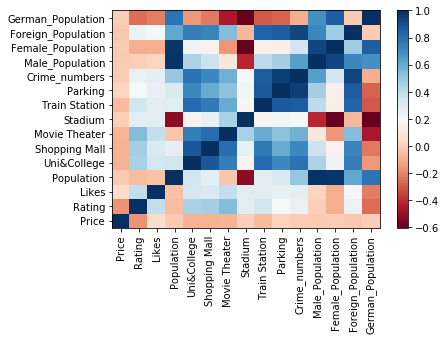

In [128]:
fig, ax = plt.subplots()
im = ax.pcolor(dfcorr, cmap='RdBu')

#label names
row_labels = dfcorr.columns.values
col_labels = dfcorr.index

#move ticks and labels to the center
ax.set_xticks(np.arange(dfcorr.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(dfcorr.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

If we look at the heat map we can see the coorelations between columns of the dataframe. We can see especially our target dependent variable *'Rating'* This allows us to visualize how the *'Rating'* is related to other variables which are in other columns. LEt's see the actual correlatin values of *'Rating'* in sorted way.

In [129]:
dfnew.corr()['Rating'].sort_values()

German_Population    -0.249195
Price                -0.159745
Female_Population    -0.093123
Population           -0.046426
Male_Population      -0.000610
Parking               0.203134
Foreign_Population    0.241458
Crime_numbers         0.250090
Stadium               0.287544
Train Station         0.350554
Likes                 0.392928
Uni&College           0.456468
Shopping Mall         0.471028
Movie Theater         0.545049
Rating                1.000000
Name: Rating, dtype: float64

#### Multiple Regression Model

In reality, there are multiple variables that effect the success( in our case-*'Rating'*) of a restaurant business. When more than one independent variable like in this study is present, the multiple linear regression model can be used to predict the *'Rating'*. Let's import necessary libraries and start modeling.

In [130]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [131]:
dfnew_num=dfnew._get_numeric_data()

In [132]:
dfnew_num.head(3)

Price  Rating  Likes  Population  Uni&College  Shopping Mall  \
0      2     7.2      8      341327           13              8   
1      1     8.2    389      341327           13              8   
2      0     7.1      7      341327           13              8   

   Movie Theater  Stadium  Train Station  Parking  Crime_numbers  \
0              6        2              3       10          49791   
1              6        2              3       10          49791   
2              6        2              3       10          49791   

   Male_Population  Female_Population  Foreign_Population  German_Population  
0           165435             175892               85244             256083  
1           165435             175892               85244             256083  
2           165435             175892               85244             256083

*'Price'* seems numerical column but it's actually categorical variable. So, we should dismis in our models. (It is possibe to convert to numeric variables0s and 1s using dummy method. However we preferred not). Let's select 'Likes', *'Population', 'Uni&College', 'Shopping Mall', 'Movie Theater', 'Stadium', 'Train Station', 'Parking', 'Crime_numbers', 'Foreign_Population', 'German_Population'* columns as independent variables for our first model and dismiss other independent variables which have less than 0.20 coorelation with *'Rating'* 

In [133]:
dfnew_num_x=dfnew_num[['Likes', 'Population',
              'Uni&College',      'Shopping Mall',      'Movie Theater',
                  'Stadium',      'Train Station',            'Parking',
            'Crime_numbers', 'German_Population', 'Foreign_Population']]
dfnew_num_y=dfnew_num[['Rating']]

#### Creating train and test dataset



In [134]:
x_train, x_test, y_train, y_test = train_test_split(dfnew_num_x, dfnew_num_y, test_size=0.20, random_state=0)

In [135]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

regr = linear_model.LinearRegression()
regr.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 9.71291557e-04  2.92238414e+09  1.70648096e-01 -1.65198471e-01
   3.02673696e-02  4.61008151e-01  7.13941708e-02  5.72347906e-02
  -1.51110784e-04 -2.92238414e+09 -2.92238414e+09]]


In [136]:
# fit the model 
regr.fit(x_train, y_train)
# Find the R^2
print('The R-square is: ', regr.score(x_train, y_train))

The R-square is:  0.4126715675897107


In addition to R-Square, we calculate 'variance score' and mean squared error (MSE)

In [137]:
y_hat= regr.predict(x_test)
y_test = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

print('Variance score: %.2f' % regr.score(x_test, y_test))

Residual sum of squares: 0.86
Variance score: 0.22


In [138]:
mse = mean_squared_error(y_test, y_hat)
print('The mean square error of Rating and predicted value is: ', mse)

The mean square error of Rating and predicted value is:  0.8615441021670799


In [139]:
#print(y_hat)

When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

#### Normalization
Let's repeat the same prediction model after normalizing the data.

In [140]:
# Let's normalize the train and test data sets respectively.

x_train = preprocessing.StandardScaler().fit(x_train).transform(x_train)
x_test = preprocessing.StandardScaler().fit(x_test).transform(x_test)

In [141]:
# fit the model 
regr.fit(x_train, y_train)
# Find the R^2
print('The R-square is: ', regr.score(x_train, y_train))

The R-square is:  0.43563698313733556


In [142]:
regr = linear_model.LinearRegression()
regr.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 0.25418166  0.70721605  0.8650806  -0.49001694  0.23463565  0.88998317
   0.09311164  0.5791981  -2.83848416 -0.24770434  1.4420277 ]]


In [143]:
y_hat= regr.predict(x_test)
y_test = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Residual sum of squares: 0.77
Variance score: 0.30


In [144]:
mse = mean_squared_error(y_test, y_hat)
print('The mean square error of Rating and predicted value is: ', mse)

The mean square error of Rating and predicted value is:  0.7654593187366441


When we compared the non-normalized model results with the normalized one, R-square values are almost the same. So, there is not much implications to the result in  this multiple regression model. On the other hand, if we look at the Coefficient values, normalized values seems much better(i.e. order of magnitude). the variance scores are 0.34 and 0.38 respectively.

In [145]:
# print(y_hat)

<h2>Cross-validation Score</h2>

When we look at the data set, we see that the samples/rows are limited. To eliminate this difficulty we can use cross-validation. Let's import <b>model_selection</b> from the module <b>cross_val_score</b>. We can see the effect of changing train and test data sets using cross-validation.

In [146]:
from sklearn.model_selection import cross_val_score

In [147]:
Rcross = cross_val_score(regr, x_train, y_train, cv=5)

The default scoring is R^2; each element in the array has the average  R^2 value in the fold:

In [148]:
Rcross

array([0.18368166, 0.35121787, 0.39947013, 0.34026652, 0.27882088])

 We can calculate the average and standard deviation of our estimate:

In [149]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.31069141214039125 and the standard deviation is 0.07422391892277924


In [150]:
from sklearn.model_selection import cross_val_predict

In [151]:
yhat = cross_val_predict(regr,x_test, y_test,cv=5)
yhat[0:5]

array([[8.7243822 ],
       [8.06458422],
       [6.42124305],
       [8.69962804],
       [7.51438388]])

## Grid Search

Sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

We create a dictionary of parameter values:

In [153]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a ridge regions object:

In [154]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Create a ridge grid search object 

In [155]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fit the model 

In [156]:
Grid1.fit(x_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [157]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

 We now test our model on the test data 

In [158]:
BestRR.score(x_test, y_test)

0.3470253669057909

When we compare multiple linear regression model with Ridge regression model, multiple linear regression madel seems favorable. On the other hand, reality, cross validated results should be compared one another. So if we compare the results of cross validated multiple linear regression model with the results of Ridge gegression model, which implicitly includes cross validated results with the GridsearchCV, Ridge regression model is favorabe model. We know that the results are not promising. However, this capstone project gave us very valuable skills.

## This is the end of the Notebook. 

On the other hand, using all these datasets many diffrent types of prediction models can be implemented.

#### Prepared by Sancak Özdemir